# Cofee Shop Sales Analisys

## Introducere

Acest set de date este ideal pentru a explora tendintele de vanzari in evolutie de-a lungul timpului, pentru a identifica zilele de varf de trafic al clientilor si pentru a explora valorile de performanta ale diferitelor produse. Setul de date cuprinde inregistrari tranzactionale de la Maven Roasters, o cafenea fictiva din New York care opereaza in trei locatii distincte. Acesta cuprinde detalii complete, cum ar fi datele tranzactiei, marcajele de timp, specificul geografic si informatiile la nivel de produs. Cercetatorii pot analiza frecventa vanzarilor de produse, pot identifica principalii factori de venit si pot investiga factorii care contribuie la fluctuatiile volumului vanzarilor.

## Cunoasterea Bazei de date

### Importuri

In [5]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib as plt
import matplotlib.pyplot as plT

### Citirea Bazei de Date si afisare

In [6]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


### Tipul coloanelor


In [7]:
df.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
transaction_qty       int64
store_id              int64
store_location       object
product_id            int64
unit_price          float64
product_category     object
product_type         object
product_detail       object
dtype: object

### Descrierea bazei de date

In [8]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


### Valorie unice din coloane(cate sunt)

In [9]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
df=pd.DataFrame(df.nunique(), columns=['Unique values Count'])
print(df)

                  Unique values Count
transaction_id                 149116
transaction_date                  181
transaction_time                25762
transaction_qty                     6
store_id                            3
store_location                      3
product_id                         80
unit_price                         41
product_category                    9
product_type                       29
product_detail                     80


### Verificarea valorilor NULL sau NaN in Baza de date


In [10]:
missing_values = df.isnull().sum()

print("Valori lipsa in fiecare coloana:")
print(missing_values)

rows_with_missing_values = df[df.isnull().any(axis=1)]

print("\n Randuri cu valori lipsa:")
print(rows_with_missing_values)

Valori lipsa in fiecare coloana:
Unique values Count    0
dtype: int64

 Randuri cu valori lipsa:
Empty DataFrame
Columns: [Unique values Count]
Index: []


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, transaction_id to product_detail
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unique values Count  11 non-null     int64
dtypes: int64(1)
memory usage: 476.0+ bytes


### Eliminarea valorilor Null sau Nan si a randurilor duplicate

In [12]:
df=df.dropna()
df=df.drop_duplicates()
df

,Unique values Count
transaction_id,149116
transaction_date,181
transaction_time,25762
transaction_qty,6
store_id,3
product_id,80
unit_price,41
product_category,9
product_type,29


### Verific daca sunt randuri duplicate

In [13]:
verif_duplicates=df.duplicated().any()
verif_duplicates

np.False_

### Histograme pentru coloanele numerice

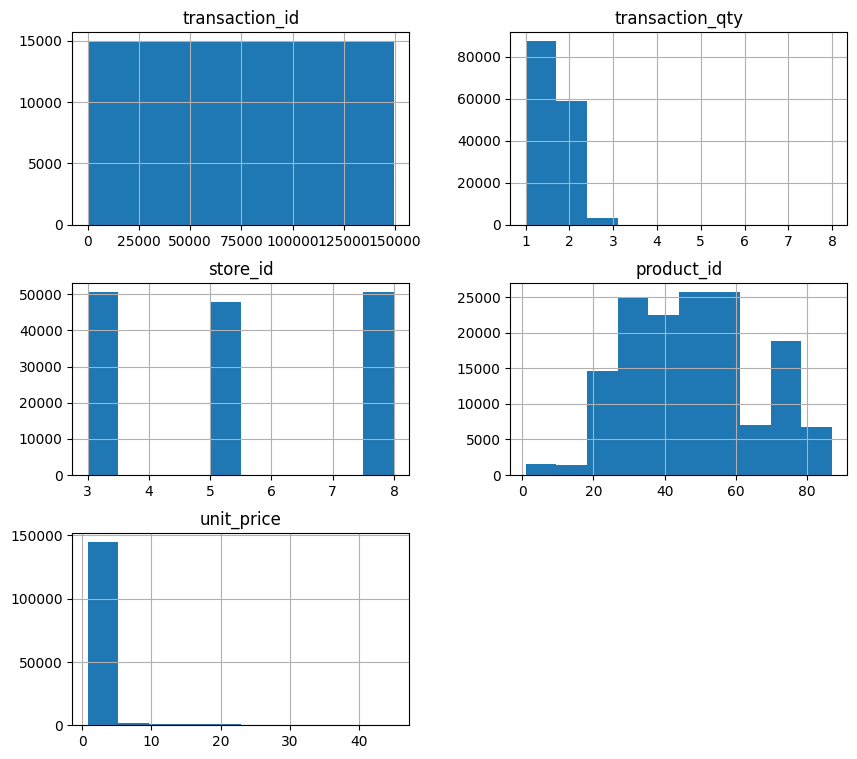

In [14]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
import matplotlib.pyplot as plT
numeric_cols = df.select_dtypes(include=['number']).columns
nr = 10
df[numeric_cols].hist(figsize=(10, 9), bins=nr)

plT.show()

### Histograme pentru store_id 3

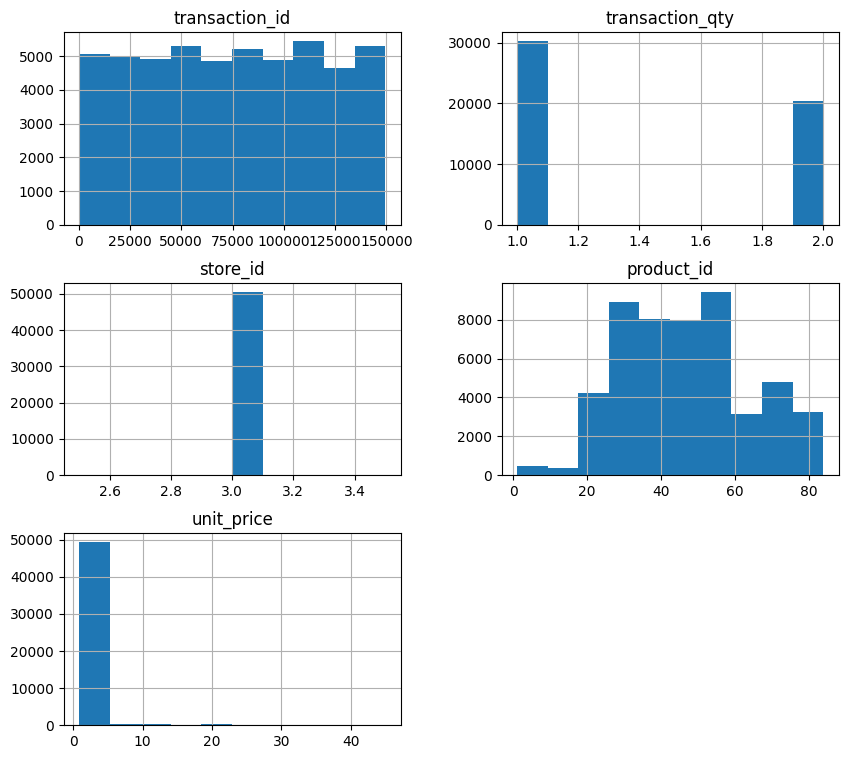

In [15]:

filtered_df_store_id_3 = df[df['store_id'] == 3]
nr = 10
filtered_df_store_id_3[numeric_cols].hist(figsize=(10, 9), bins=nr)
plT.show()

### Histograme pentru store_id 5

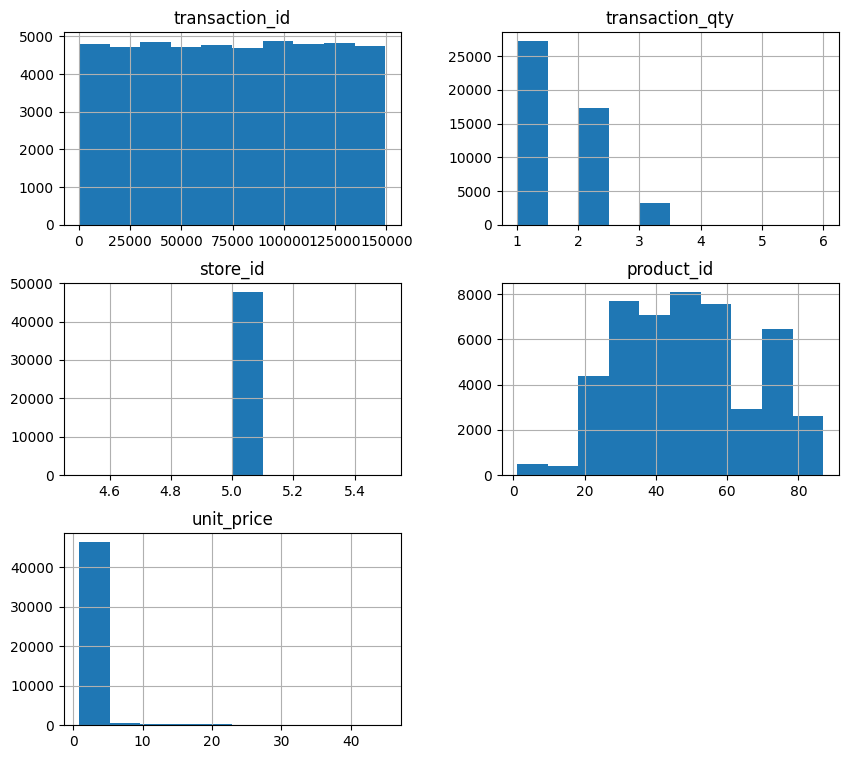

In [16]:
filtered_df_store_id_5 = df[df['store_id'] == 5]
nr = 10 
filtered_df_store_id_5[numeric_cols].hist(figsize=(10, 9), bins=nr)

plT.show()

### Histograme pentru store_id 8

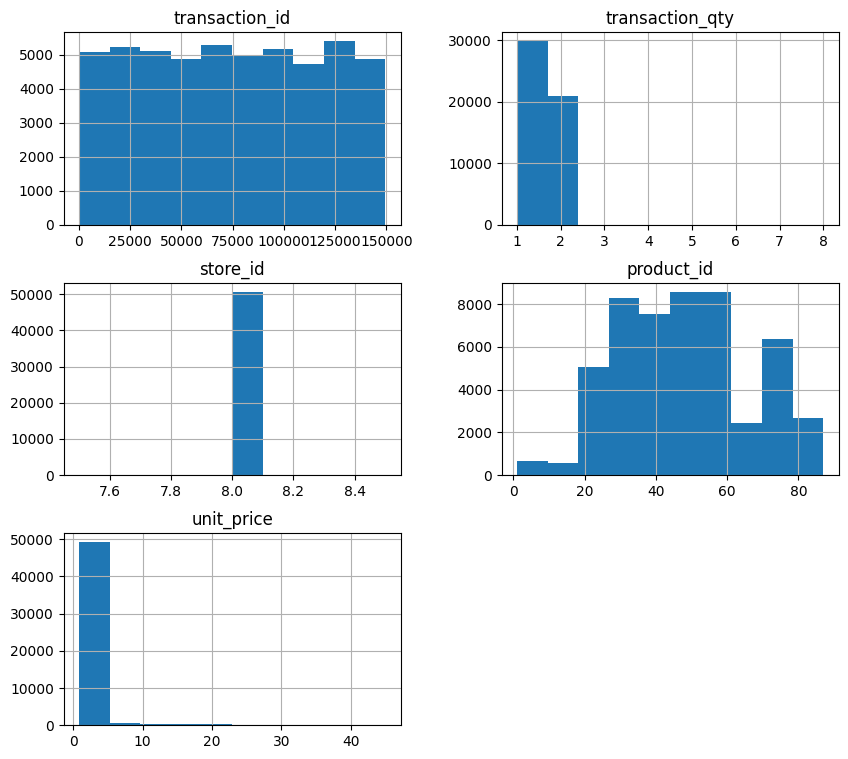

In [17]:
filtered_df_store_id_8= df[df['store_id'] == 8]
nr = 10  
filtered_df_store_id_8[numeric_cols].hist(figsize=(10, 9), bins=nr)
plT.show()

### Matrice de corelatie

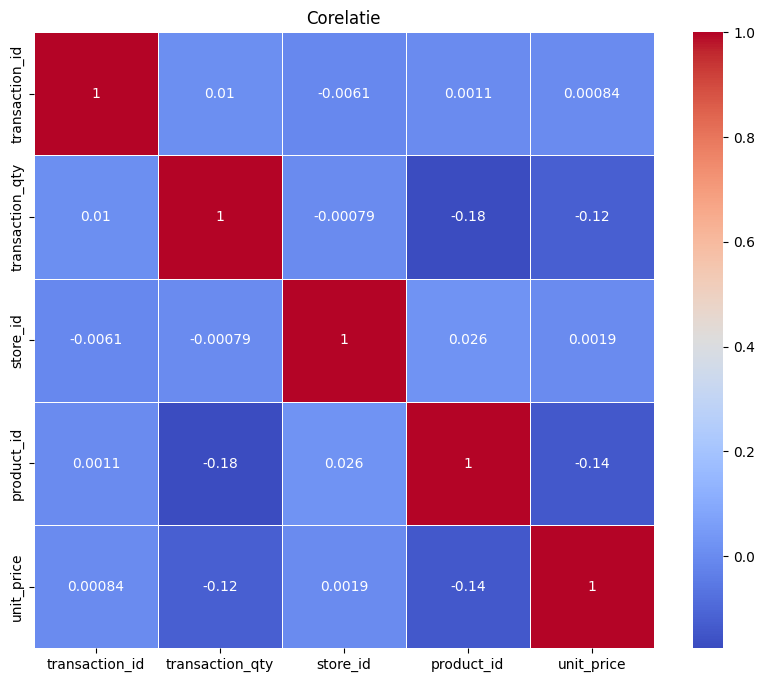

In [18]:


# Selectarea coloanelor numerice
numeric_df = df.select_dtypes(include=['number'])

# Calcularea matricei de corelatie
correlation_matrix = numeric_df.corr()


# print("Corelatie:")
# print(correlation_matrix)

plT.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plT.title('Corelatie')
plT.show()

### Gini index

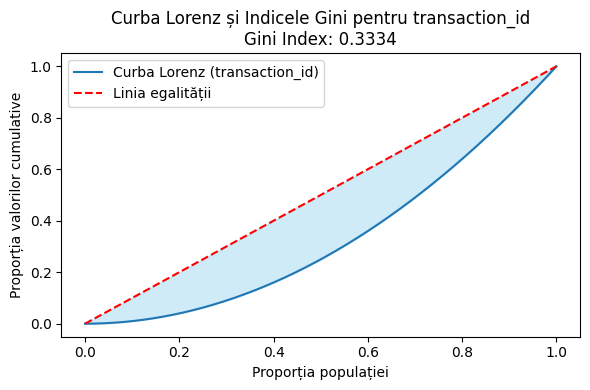

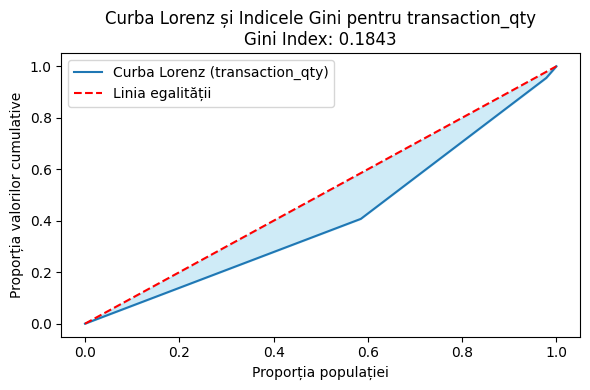

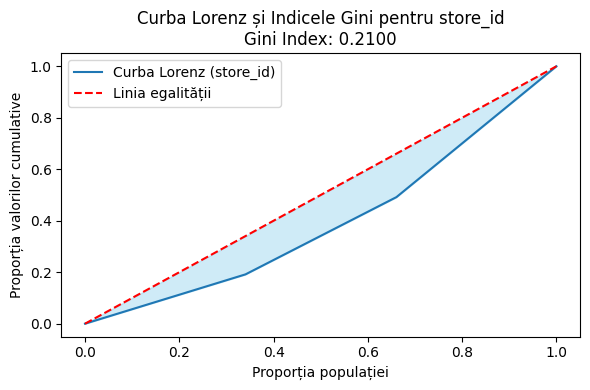

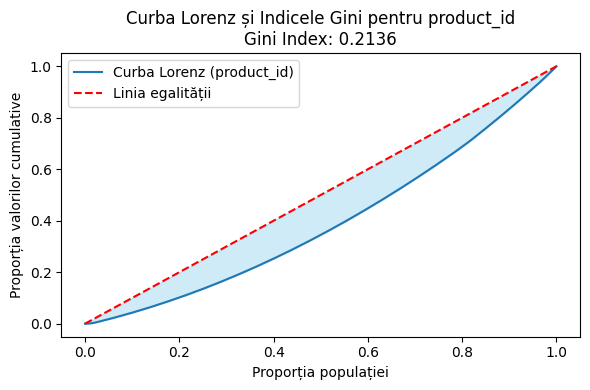

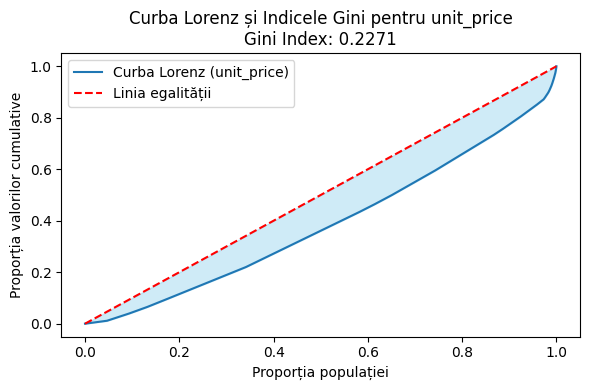

In [19]:
def lorenz_curve(array):
    array = np.sort(array)  # Sortare in ordine crescatoare
    cumulative_values = np.cumsum(array)  #Suma valori
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizare la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  
    return cumulative_values, gini

numeric_cols = df.select_dtypes(include=['number'])

# Crearea curbelor Lorenz si calcularea indicelui Gini pentru fiecare coloana numerica
for col in numeric_cols.columns:
    values = numeric_cols[col].dropna().values  #Eliminare valori lipsa
    cumulative_values, gini = lorenz_curve(values)
    

    plT.figure(figsize=(6, 4))
    plT.plot(np.linspace(0, 1, len(cumulative_values)), cumulative_values, label=f'Curba Lorenz ({col})')
    plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalității')
    plT.fill_between(np.linspace(0, 1, len(cumulative_values)), cumulative_values, np.linspace(0, 1, len(cumulative_values)), color='skyblue', alpha=0.4)
    plT.title(f'Curba Lorenz și Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
    plT.xlabel('Proporția populației')
    plT.ylabel('Proporția valorilor cumulative')
    plT.legend()
    plT.tight_layout()
    plT.show()

### Information Quantity

In [20]:
def entropy(column):
    probabilities = column.value_counts(normalize=True)
    probabilities = probabilities[probabilities > 0]
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Calcularea entropiei pentru fiecare coloana
entropy_values = {}
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':  # Pentru coloane categorice
        entropy_values[col] = entropy(df[col])
    elif np.issubdtype(df[col].dtype, np.number):  # Pentru coloane numerice
        entropy_values[col] = entropy(pd.cut(df[col], bins=10))  # Grupam valorile numerice in intervale

# Afisare entropiei
print("Entropia (Information Quantity) pentru fiecare coloana:")
for col, entropy in entropy_values.items():
    print(f"{col}: {entropy:.4f}")

Entropia (Information Quantity) pentru fiecare coloana:
transaction_id: 3.3219
transaction_date: 7.4365
transaction_time: 14.3346
transaction_qty: 1.1066
store_id: 1.5844
store_location: 1.5844
product_id: 2.9661
unit_price: 0.2518
product_category: 2.1508
product_type: 3.9336
product_detail: 5.9359


#### Entropia pentru fiecare coloana

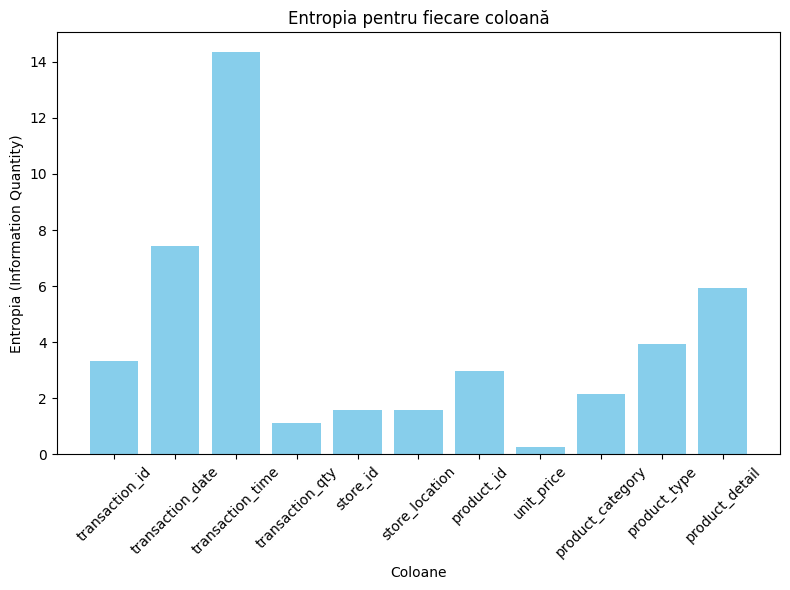

In [21]:

plT.figure(figsize=(8, 6))
plT.bar(entropy_values.keys(), entropy_values.values(), color='skyblue')
plT.xlabel('Coloane')
plT.ylabel('Entropia (Information Quantity)')
plT.title('Entropia pentru fiecare coloană')
plT.xticks(rotation=45)
plT.tight_layout()
plT.show()

### Store_id 3 Gini Index

Gini Index și Curba Lorenz pentru store_id 3:
  transaction_id: 0.3328


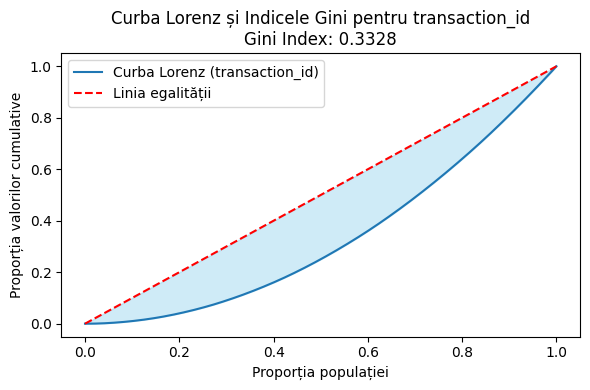

  transaction_qty: 0.1715


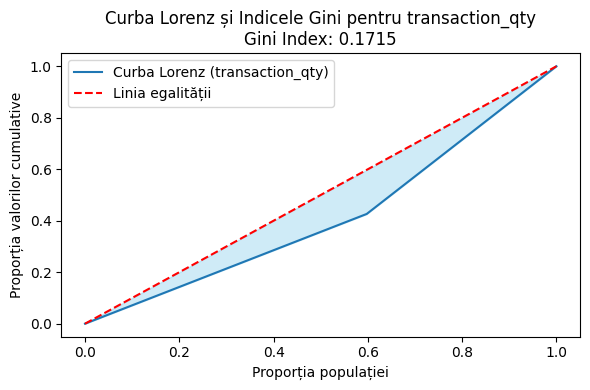

  product_id: 0.2068


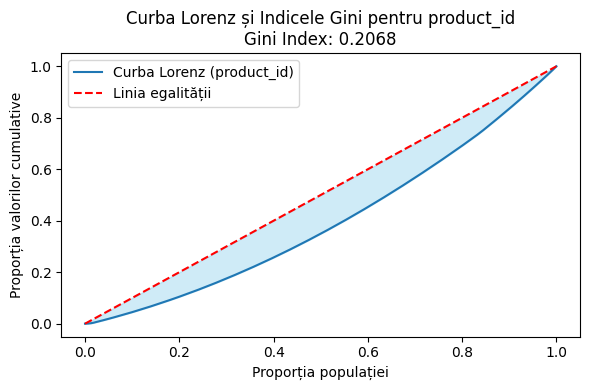

  unit_price: 0.2114


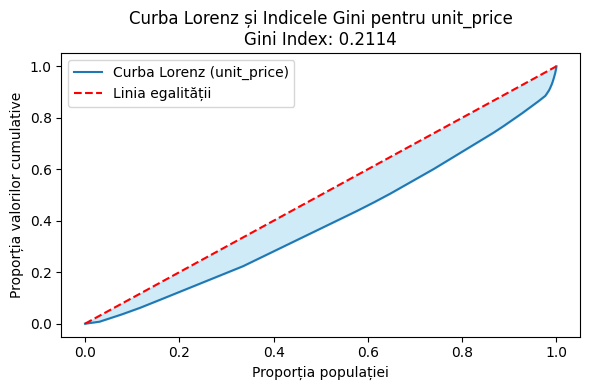

In [22]:
def gini_index_and_lorenz_curve(array):
    array = np.sort(array)  # Sortare în ordine crescatoare
    cumulative_values = np.cumsum(array)  # Suma valorilor
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizam la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  # Calculam indicele Gini
    return gini, cumulative_values


# Filtrarea datelor pentru store_id = 3
filtered_df_store_id_3 = df[df['store_id'] == 3]

# Selectarea coloanelor numerice
numeric_cols = filtered_df_store_id_3.select_dtypes(include=['number']).drop(columns=['store_id'], errors='ignore')

# Calcularea Gini Index si desenarea curbei Lorenz pentru fiecare coloana numerica
print("Gini Index și Curba Lorenz pentru store_id 3:")
for col in numeric_cols.columns:
    if filtered_df_store_id_3[col].sum() > 0:  # Verificam dacă exista valori nenule
        gini, lorenz_curve = gini_index_and_lorenz_curve(filtered_df_store_id_3[col].values)
        print(f"  {col}: {gini:.4f}")
        
        # Desenarea curbei Lorenz
        plT.figure(figsize=(6, 4))
        plT.plot(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, label=f'Curba Lorenz ({col})')
        plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalității')
        plT.fill_between(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, np.linspace(0, 1, len(lorenz_curve)), color='skyblue', alpha=0.4)
        plT.title(f'Curba Lorenz și Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
        plT.xlabel('Proporția populației')
        plT.ylabel('Proporția valorilor cumulative')
        plT.legend()
        plT.tight_layout()
        plT.show()
    else:
        print(f"  {col}: Nu se poate calcula (toate valorile sunt 0)")

### Store_id 5 Gini Index

Gini Index și Curba Lorenz pentru store_id 5:
  transaction_id: 0.3331


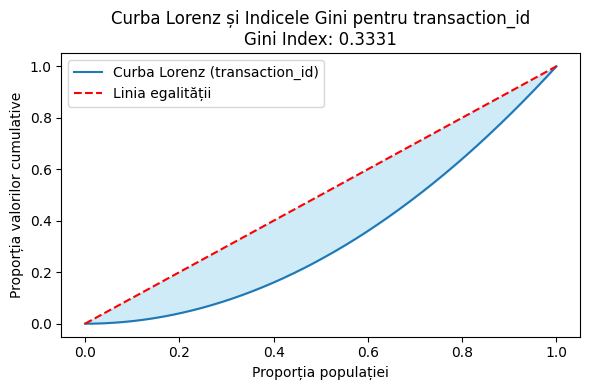

  transaction_qty: 0.2067


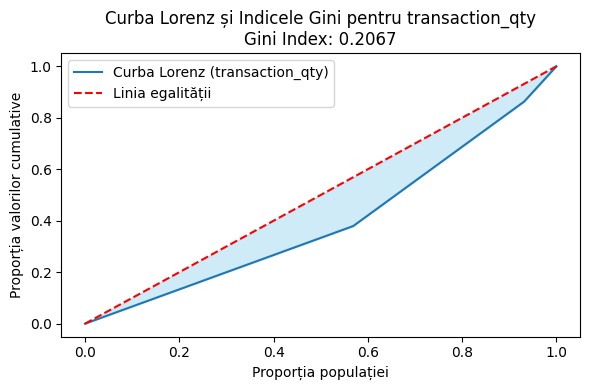

  product_id: 0.2140


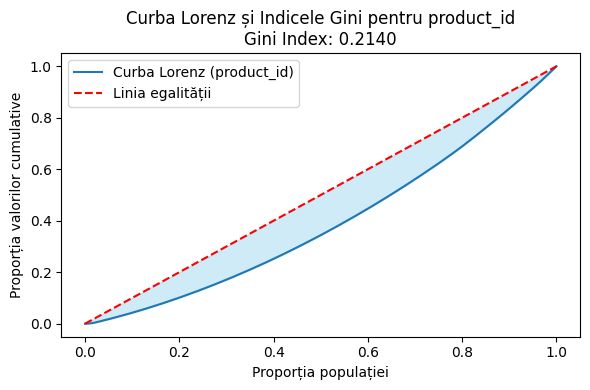

  unit_price: 0.2386


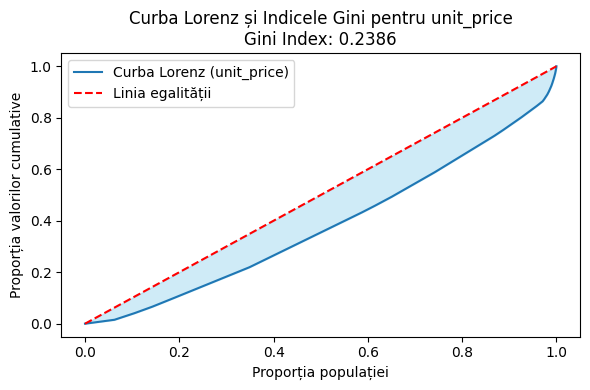

In [23]:
def gini_index_and_lorenz_curve(array):
    array = np.sort(array)  # Sortare in ordine crescatoare
    cumulative_values = np.cumsum(array)  # Suma valorilor
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizam la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  # Calculam indicele Gini
    return gini, cumulative_values

# Filtrarea datelor pentru store_id = 5
filtered_df_store_id_5 = df[df['store_id'] == 5]

# Selectarea coloanelor numerice
numeric_cols = filtered_df_store_id_5.select_dtypes(include=['number']).drop(columns=['store_id'], errors='ignore')

# Calcularea Gini Index si desenarea curbei Lorenz pentru fiecare coloana numerica
print("Gini Index și Curba Lorenz pentru store_id 5:")
for col in numeric_cols.columns:
    if filtered_df_store_id_5[col].sum() > 0:  # Verificam daca exista valori nenule
        gini, lorenz_curve = gini_index_and_lorenz_curve(filtered_df_store_id_5[col].values)
        print(f"  {col}: {gini:.4f}")
        
        # Desenarea curbei Lorenz
        plT.figure(figsize=(6, 4))
        plT.plot(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, label=f'Curba Lorenz ({col})')
        plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalității')
        plT.fill_between(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, np.linspace(0, 1, len(lorenz_curve)), color='skyblue', alpha=0.4)
        plT.title(f'Curba Lorenz și Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
        plT.xlabel('Proporția populației')
        plT.ylabel('Proporția valorilor cumulative')
        plT.legend()
        plT.tight_layout()
        plT.show()
    else:
        print(f"  {col}: Nu se poate calcula (toate valorile sunt 0)")

### Store_id 8 Gini Index

Gini Index și Curba Lorenz pentru store_id 8:
  transaction_id: 0.3341


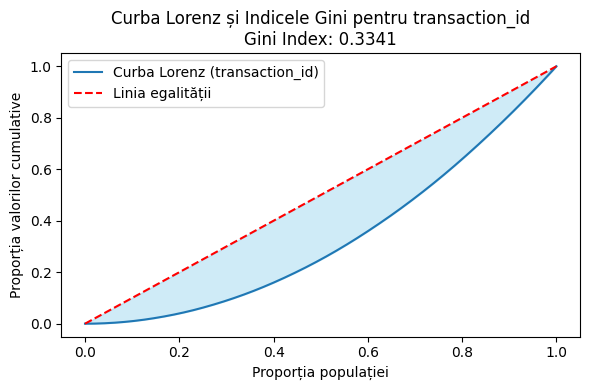

  transaction_qty: 0.1723


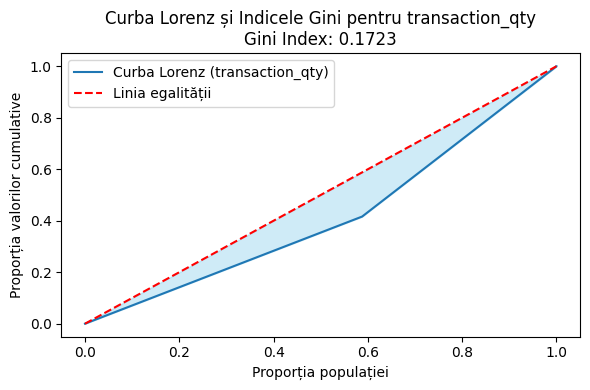

  product_id: 0.2187


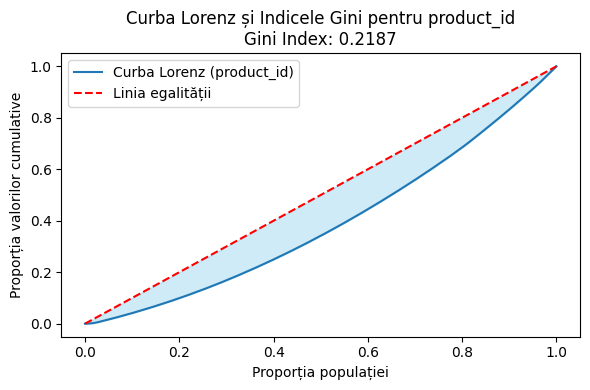

  unit_price: 0.2318


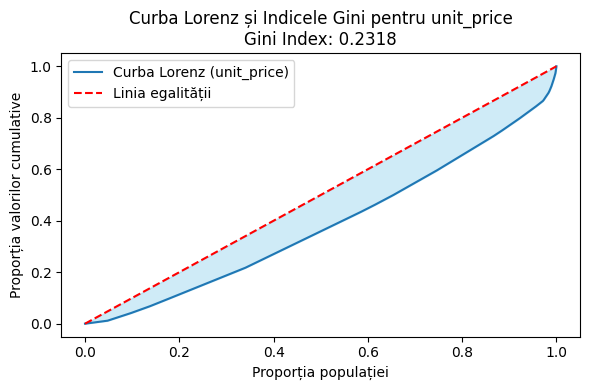

In [24]:
def gini_index_and_lorenz_curve(array):
    array = np.sort(array)  # Sortare în ordine crescatoare
    cumulative_values = np.cumsum(array)  # Suma valorilor
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizam la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  # Calculam indicele Gini
    return gini, cumulative_values

# Filtrarea datelor pentru store_id = 8
filtered_df_store_id_8 = df[df['store_id'] == 8]

# Selectarea coloanelor numerice
numeric_cols = filtered_df_store_id_8.select_dtypes(include=['number']).drop(columns=['store_id'], errors='ignore')

# Calcularea Gini Index si desenarea curbei Lorenz pentru fiecare coloana numerica
print("Gini Index și Curba Lorenz pentru store_id 8:")
for col in numeric_cols.columns:
    if filtered_df_store_id_8[col].sum() > 0:  # Verificam daca exista valori nenule
        gini, lorenz_curve = gini_index_and_lorenz_curve(filtered_df_store_id_8[col].values)
        print(f"  {col}: {gini:.4f}")
        
        # Desenarea curbei Lorenz
        plT.figure(figsize=(6, 4))
        plT.plot(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, label=f'Curba Lorenz ({col})')
        plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalității')
        plT.fill_between(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, np.linspace(0, 1, len(lorenz_curve)), color='skyblue', alpha=0.4)
        plT.title(f'Curba Lorenz și Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
        plT.xlabel('Proporția populației')
        plT.ylabel('Proporția valorilor cumulative')
        plT.legend()
        plT.tight_layout()
        plT.show()
    else:
        print(f"  {col}: Nu se poate calcula (toate valorile sunt 0)")

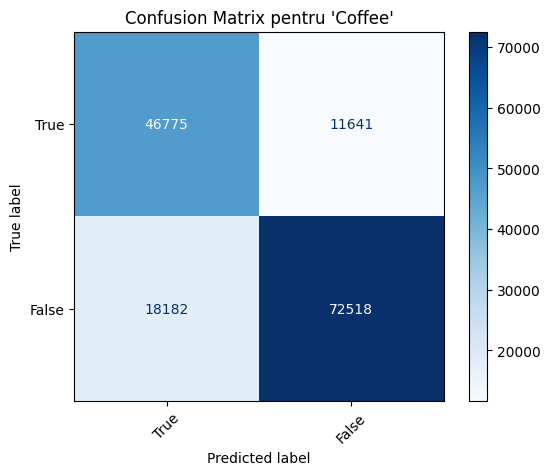

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

target_class = 'Coffee' 
true_labels_binary = (df['product_category'] == target_class).astype(int)  # 1 pentru clasa dorita, 0 altfel

np.random.seed(42) 
predicted_labels_binary = true_labels_binary.copy()
indices_to_modify = np.random.choice(len(true_labels_binary), size=int(0.2 * len(true_labels_binary)), replace=False)  # 20% zgomot
predicted_labels_binary.iloc[indices_to_modify] = 1 - predicted_labels_binary.iloc[indices_to_modify]  

# Calculam matricea de confuzie
cm = confusion_matrix(true_labels_binary, predicted_labels_binary, labels=[1, 0]) 

# Afisam matricea de confuzie
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True', 'False'])
disp.plot(cmap='Blues', xticks_rotation=45)
plT.title(f"Confusion Matrix pentru '{target_class}'")
plT.show()

In [26]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import (
#     mean_squared_error,
#     r2_score,
#     accuracy_score,
#     classification_report,
#     confusion_matrix,
#     ConfusionMatrixDisplay,
# )

# # 1. Load data
# df = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")

# # 2. Data Cleaning
# df = df.dropna()
# df = df.drop_duplicates()

# # 3. Encode categorical columns
# categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
# label_encoders = {}
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# # 4. Feature Selection
# features = [col for col in df.columns if col not in ["transaction_id", "transaction_date", "transaction_time", "unit_price"]]
# target_regression = "unit_price"
# target_classification = "is_expensive"

# # Create a binary target for classification
# df[target_classification] = (df[target_regression] > df[target_regression].median()).astype(int)

# # 5. Split data into train/test sets
# X = df[features]
# y_regression = df[target_regression]
# y_classification = df[target_classification]

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
# X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# # Scale numerical features
# scaler = StandardScaler()
# X_train_reg = scaler.fit_transform(X_train_reg)
# X_test_reg = scaler.transform(X_test_reg)
# X_train_clf = scaler.fit_transform(X_train_clf)
# X_test_clf = scaler.transform(X_test_clf)

# # 6. Train Models
# # (a) Linear Regression
# lin_reg = LinearRegression()
# lin_reg.fit(X_train_reg, y_train_reg)
# y_pred_reg = lin_reg.predict(X_test_reg)

# # Cross-validation for Linear Regression
# cv_scores_lin_reg = cross_val_score(lin_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_lin_reg = cv_scores_lin_reg.mean()

# # (b) Logistic Regression
# log_reg = LogisticRegression(max_iter=5000, random_state=42, class_weight="balanced", solver="saga")
# log_reg.fit(X_train_clf, y_train_clf)
# y_pred_clf = log_reg.predict(X_test_clf)

# # Cross-validation for Logistic Regression
# cv_scores_log_reg = cross_val_score(log_reg, X, y_classification, cv=5, scoring="accuracy")
# mean_acc_log_reg = cv_scores_log_reg.mean()

# # (c) Random Forest
# rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_reg.fit(X_train_reg, y_train_reg)
# y_pred_rf_reg = rf_reg.predict(X_test_reg)

# rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_clf.fit(X_train_clf, y_train_clf)
# y_pred_rf_clf = rf_clf.predict(X_test_clf)

# # Cross-validation for Random Forest Regression
# cv_scores_rf_reg = cross_val_score(rf_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_rf_reg = cv_scores_rf_reg.mean()

# # Cross-validation for Random Forest Classification
# cv_scores_rf_clf = cross_val_score(rf_clf, X, y_classification, cv=5, scoring="accuracy")
# mean_acc_rf_clf = cv_scores_rf_clf.mean()

# # 7. Evaluate Models
# # Regression Metrics
# mse_lin_reg = mean_squared_error(y_test_reg, y_pred_reg)
# r2_lin_reg = r2_score(y_test_reg, y_pred_reg)
# mse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg)
# r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)

# # Classification Metrics
# acc_log_reg = accuracy_score(y_test_clf, y_pred_clf)
# acc_rf_clf = accuracy_score(y_test_clf, y_pred_rf_clf)

# # 8. Compare Models
# print("\n--- Comparison of Models ---")
# print("Linear Regression:")
# print(f"  Test MSE: {mse_lin_reg:.4f}, Test R2: {r2_lin_reg:.4f}, CV Mean R2: {mean_r2_lin_reg:.4f}")
# print("\nRandom Forest Regression:")
# print(f"  Test MSE: {mse_rf_reg:.4f}, Test R2: {r2_rf_reg:.4f}, CV Mean R2: {mean_r2_rf_reg:.4f}")
# print("\nLogistic Regression:")
# print(f"  Test Accuracy: {acc_log_reg:.4f}, CV Mean Accuracy: {mean_acc_log_reg:.4f}")
# print("\nRandom Forest Classification:")
# print(f"  Test Accuracy: {acc_rf_clf:.4f}, CV Mean Accuracy: {mean_acc_rf_clf:.4f}")

# # Determine the best model
# best_regression_model = "Random Forest Regression" if mean_r2_rf_reg > mean_r2_lin_reg else "Linear Regression"
# best_classification_model = "Random Forest Classification" if mean_acc_rf_clf > mean_acc_log_reg else "Logistic Regression"

# print("\nBest Regression Model:", best_regression_model)
# print("Best Classification Model:", best_classification_model)

In [27]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import (
#     mean_squared_error,
#     r2_score,
#     accuracy_score,
#     classification_report,
#     confusion_matrix,
#     ConfusionMatrixDisplay,
# )

# # 1. Load data
# df = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")

# # 2. Data Cleaning
# df = df.dropna()
# df = df.drop_duplicates()

# # 3. Encode categorical columns
# categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
# label_encoders = {}
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# # 4. Feature Selection
# features = [col for col in df.columns if col not in ["transaction_id", "transaction_date", "transaction_time", "unit_price"]]
# target_regression = "unit_price"
# target_classification = "is_expensive"

# # Create a binary target for classification
# df[target_classification] = (df[target_regression] > df[target_regression].median()).astype(int)

# # 5. Split data into train/test sets
# X = df[features]
# y_regression = df[target_regression]
# y_classification = df[target_classification]

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
# X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# # Scale numerical features
# scaler = StandardScaler()
# X_train_reg = scaler.fit_transform(X_train_reg)
# X_test_reg = scaler.transform(X_test_reg)
# X_train_clf = scaler.fit_transform(X_train_clf)
# X_test_clf = scaler.transform(X_test_clf)

# # 6. Train Models
# # (a) Linear Regression
# lin_reg = LinearRegression()
# lin_reg.fit(X_train_reg, y_train_reg)
# y_pred_reg = lin_reg.predict(X_test_reg)

# # Cross-validation for Linear Regression
# cv_scores_lin_reg = cross_val_score(lin_reg, X, y_regression, cv=5, scoring="r2")
# print("\nCross-Validation Results for Linear Regression:")
# print(f"R2 Scores: {cv_scores_lin_reg}")
# print(f"Mean R2: {cv_scores_lin_reg.mean():.2f}")
# # print(f"Standard Deviation of R2: {cv_scores_lin_reg.std():.2f}")

# # (b) Logistic Regression
# log_reg = LogisticRegression(max_iter=5000, random_state=42, class_weight="balanced", solver="saga")
# log_reg.fit(X_train_clf, y_train_clf)
# y_pred_clf = log_reg.predict(X_test_clf)

# # Cross-validation for Logistic Regression
# cv_scores_log_reg = cross_val_score(log_reg, X, y_classification, cv=5, scoring="accuracy")
# print("\nCross-Validation Results for Logistic Regression:")
# print(f"Accuracy Scores: {cv_scores_log_reg}")
# print(f"Mean Accuracy: {cv_scores_log_reg.mean():.2f}")
# # print(f"Standard Deviation of Accuracy: {cv_scores_log_reg.std():.2f}")

# # (c) Random Forest
# rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_reg.fit(X_train_reg, y_train_reg)
# y_pred_rf_reg = rf_reg.predict(X_test_reg)

# # rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# # rf_clf.fit(X_train_clf, y_train_clf)
# # y_pred_rf_clf = rf_clf.predict(X_test_clf)

# # Cross-validation for Random Forest Regression
# cv_scores_rf_reg = cross_val_score(rf_reg, X, y_regression, cv=5, scoring="r2")
# print("\nCross-Validation Results for Random Forest Regression:")
# print(f"R2 Scores: {cv_scores_rf_reg}")
# print(f"Mean R2: {cv_scores_rf_reg.mean():.2f}")
# # print(f"Standard Deviation of R2: {cv_scores_rf_reg.std():.2f}")

# # # Cross-validation for Random Forest Classification
# # cv_scores_rf_clf = cross_val_score(rf_clf, X, y_classification, cv=5, scoring="accuracy")
# # print("\nCross-Validation Results for Random Forest Classification:")
# # print(f"Accuracy Scores: {cv_scores_rf_clf}")
# # print(f"Mean Accuracy: {cv_scores_rf_clf.mean():.2f}")
# # print(f"Standard Deviation of Accuracy: {cv_scores_rf_clf.std():.2f}")

# # 7. Evaluate Models
# # Regression Metrics
# print("\nLinear Regression MSE:", mean_squared_error(y_test_reg, y_pred_reg))
# print("Linear Regression R2:", r2_score(y_test_reg, y_pred_reg))
# print("Random Forest Regression MSE:", mean_squared_error(y_test_reg, y_pred_rf_reg))
# print("Random Forest Regression R2:", r2_score(y_test_reg, y_pred_rf_reg))

# # Classification Metrics
# print("\nLogistic Regression Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
# # print("Random Forest Classification Accuracy:", accuracy_score(y_test_clf, y_pred_rf_clf))
# # print("\nClassification Report (Logistic Regression):\n", classification_report(y_test_clf, y_pred_clf))
# # print("\nClassification Report (Random Forest):\n", classification_report(y_test_clf, y_pred_rf_clf))

# # Confusion Matrix for Logistic Regression
# cm_log = confusion_matrix(y_test_clf, y_pred_clf)
# disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Not Expensive", "Expensive"])
# disp_log.plot(cmap="Blues")
# plT.title("Confusion Matrix - Logistic Regression")
# plT.show()

# # Confusion Matrix for Random Forest
# cm_rf = confusion_matrix(y_test_clf, y_pred_rf_clf)
# disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Not Expensive", "Expensive"])
# disp_rf.plot(cmap="Blues")
# plT.title("Confusion Matrix - Random Forest")
# plT.show()
# # Logistic Regression Accuracy
# log_reg_accuracy = accuracy_score(y_test_clf, y_pred_clf)
# print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")

# # Linear Regression R²
# lin_reg_r2 = r2_score(y_test_reg, y_pred_reg)
# print(f"Linear Regression R²: {lin_reg_r2:.4f}")

# # Random Forest Regression R²
# rf_reg_r2 = r2_score(y_test_reg, y_pred_rf_reg)
# print(f"Random Forest Regression R²: {rf_reg_r2:.4f}")




In [28]:
# def compare_models(results):
#     """
#     Compara modelele de regresie și clasificare și returnează cele mai bune modele.
    
#     Parameters:
#         results (dict): Dicționar cu rezultatele modelelor.
        
#     Returns:
#         dict: Cele mai bune modele pentru regresie și clasificare.
#     """
#     # Comparăm modelele de regresie pe baza R²
#     best_regression_model = max(results['regression'], key=lambda x: results['regression'][x]['mean_r2'])
    
#     # Comparăm modelele de clasificare pe baza acurateței
#     best_classification_model = max(results['classification'], key=lambda x: results['classification'][x]['mean_accuracy'])
    
#     return {
#         "best_regression_model": best_regression_model,
#         "best_classification_model": best_classification_model
#     }


# # 1. Calculăm rezultatele pentru fiecare model
# results = {
#     "regression": {
#         "Linear Regression": {
#             "mean_r2": cv_scores_lin_reg.mean(),
#             "test_r2": r2_score(y_test_reg, y_pred_reg),
#             "test_mse": mean_squared_error(y_test_reg, y_pred_reg)
#         },
#         "Random Forest Regression": {
#             "mean_r2": cv_scores_rf_reg.mean(),
#             "test_r2": r2_score(y_test_reg, y_pred_rf_reg),
#             "test_mse": mean_squared_error(y_test_reg, y_pred_rf_reg)
#         }
#     },
#     "classification": {
#         "Logistic Regression": {
#             "mean_accuracy": cv_scores_log_reg.mean(),
#             "test_accuracy": accuracy_score(y_test_clf, y_pred_clf)
#         }
#     }
# }

# # 2. Comparăm modelele
# best_models = compare_models(results)

# # 3. Afișăm rezultatele
# print("\n--- Cross-Validation Results ---")
# print("Linear Regression:")
# print(f"  Mean R2: {cv_scores_lin_reg.mean():.4f}")
# print("Random Forest Regression:")
# print(f"  Mean R2: {cv_scores_rf_reg.mean():.4f}")
# print("Logistic Regression:")
# print(f"  Mean Accuracy: {cv_scores_log_reg.mean():.4f}")

# print("\n--- Test Set Performance ---")
# print("Linear Regression:")
# print(f"  Test MSE: {mean_squared_error(y_test_reg, y_pred_reg):.4f}, Test R2: {r2_score(y_test_reg, y_pred_reg):.4f}")
# print("Random Forest Regression:")
# print(f"  Test MSE: {mean_squared_error(y_test_reg, y_pred_rf_reg):.4f}, Test R2: {r2_score(y_test_reg, y_pred_rf_reg):.4f}")
# print("Logistic Regression:")
# print(f"  Test Accuracy: {accuracy_score(y_test_clf, y_pred_clf):.4f}")

# print("\n--- Best Models ---")
# print(f"Best Regression Model: {best_models['best_regression_model']}")

In [29]:
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# # 1. Load data
# df = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")
# df = df.dropna().drop_duplicates()

# # 2. Encode categorical columns
# categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])

# # 3. Feature Selection
# features = [col for col in df.columns if col not in ["transaction_id", "transaction_date", "transaction_time", "unit_price"]]
# target_regression = "unit_price"
# target_classification = "is_expensive"
# df[target_classification] = (df[target_regression] > df[target_regression].median()).astype(int)

# # 4. Split data
# X = df[features]
# y_regression = df[target_regression]
# y_classification = df[target_classification]
# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
# X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# # 5. Scale data
# scaler = StandardScaler()
# X_train_reg = scaler.fit_transform(X_train_reg)
# X_test_reg = scaler.transform(X_test_reg)
# X_train_clf = scaler.fit_transform(X_train_clf)
# X_test_clf = scaler.transform(X_test_clf)

# # 6. Hyperparameter Optimization
# log_reg_params = {'C': [0.1, 1, 10], 'solver': ['liblinear'], 'class_weight': ['balanced']}
# rf_reg_params = {'n_estimators': [50, 100], 'max_depth': [None, 10]}

# log_reg_random = RandomizedSearchCV(LogisticRegression(max_iter=5000, random_state=42), log_reg_params, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, n_iter=5)
# rf_reg_random = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_reg_params, scoring='r2', cv=3, verbose=1, n_jobs=-1, n_iter=5)

# log_reg_random.fit(X_train_clf, y_train_clf)
# rf_reg_random.fit(X_train_reg, y_train_reg)

# # 7. Evaluate
# print("Best Logistic Regression Params:", log_reg_random.best_params_)
# print("Best Random Forest Regression Params:", rf_reg_random.best_params_)

# y_pred_clf = log_reg_random.best_estimator_.predict(X_test_clf)
# y_pred_reg = rf_reg_random.best_estimator_.predict(X_test_reg)

# print("Logistic Regression Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
# print("Random Forest Regression R²:", r2_score(y_test_reg, y_pred_reg))

In [30]:
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import (
#     mean_squared_error,
#     r2_score,
#     accuracy_score,
#     classification_report,
#     confusion_matrix,
#     ConfusionMatrixDisplay,
# )

# # 1. Citirea și curățarea datelor
# df = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")
# df = df.dropna().drop_duplicates()
# df['month'] = pd.to_datetime(df['transaction_date']).dt.month

# # 2. Codificarea coloanelor categorice
# categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
# label_encoders = {}
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# # 3. Selectarea caracteristicilor și a țintelor
# features = [col for col in df.columns if col not in ["transaction_id", "transaction_date", "transaction_time", "unit_price"]]
# target_regression = "unit_price"
# target_classification = "is_expensive"


# # Crearea unei ținte binare pentru clasificare
# df[target_classification] = (df[target_regression] > df[target_regression].median()).astype(int)

# # 4. Împărțirea datelor în seturi de antrenament și testare
# X = df[features]
# y_regression = df[target_regression]
# y_classification = df[target_classification]

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
# X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
#     X, y_classification, test_size=0.2, random_state=42, stratify=y_classification
# )

# # 5. Scalarea caracteristicilor numerice
# scaler = StandardScaler()
# X_train_reg = scaler.fit_transform(X_train_reg)
# X_test_reg = scaler.transform(X_test_reg)
# X_train_clf = scaler.fit_transform(X_train_clf)
# X_test_clf = scaler.transform(X_test_clf)

# # 6. Optimizarea hiperparametrilor
# # (a) Logistic Regression
# log_reg_params = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'solver': ['liblinear', 'saga'],
#     'class_weight': ['balanced', None]
# }
# log_reg_grid = GridSearchCV(
#     LogisticRegression(max_iter=5000, random_state=42),
#     param_grid=log_reg_params,
#     scoring='accuracy',
#     cv=3,
#     verbose=1,
#     n_jobs=-1
# )
# log_reg_grid.fit(X_train_clf, y_train_clf)
# best_log_reg = log_reg_grid.best_estimator_

# # (b) Random Forest Regression
# rf_reg_params = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }
# rf_reg_grid = GridSearchCV(
#     RandomForestRegressor(random_state=42),
#     param_grid=rf_reg_params,
#     scoring='r2',
#     cv=3,
#     verbose=1,
#     n_jobs=-1
# )
# rf_reg_grid.fit(X_train_reg, y_train_reg)
# best_rf_reg = rf_reg_grid.best_estimator_

# # 7. Antrenarea modelelor fără cross-validation
# # (a) Linear Regression
# lin_reg = LinearRegression()
# lin_reg.fit(X_train_reg, y_train_reg)
# y_pred_reg = lin_reg.predict(X_test_reg)
# mse_lin_reg = mean_squared_error(y_test_reg, y_pred_reg)
# r2_lin_reg = r2_score(y_test_reg, y_pred_reg)

# # (b) Logistic Regression
# y_pred_clf = best_log_reg.predict(X_test_clf)
# acc_log_reg = accuracy_score(y_test_clf, y_pred_clf)

# # (c) Random Forest Regression
# y_pred_rf_reg = best_rf_reg.predict(X_test_reg)
# mse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg)
# r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)

# # 8. Evaluarea modelelor cu cross-validation
# # Cross-validation pentru Linear Regression
# cv_scores_lin_reg = cross_val_score(lin_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_lin_reg = cv_scores_lin_reg.mean()

# # Cross-validation pentru Logistic Regression
# cv_scores_log_reg = cross_val_score(best_log_reg, X, y_classification, cv=5, scoring="accuracy")
# mean_acc_log_reg = cv_scores_log_reg.mean()

# # Cross-validation pentru Random Forest Regression
# cv_scores_rf_reg = cross_val_score(best_rf_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_rf_reg = cv_scores_rf_reg.mean()

# # 9. Afișarea rezultatelor
# print("\n--- Results Without Cross-Validation ---")
# print(f"Linear Regression: Test MSE: {mse_lin_reg:.4f}, Test R²: {r2_lin_reg:.4f}")
# print(f"Logistic Regression: Test Accuracy: {acc_log_reg:.4f}")
# print(f"Random Forest Regression: Test MSE: {mse_rf_reg:.4f}, Test R²: {r2_rf_reg:.4f}")

# print("\n--- Results With Cross-Validation ---")
# print(f"Linear Regression: Cross-Validation Mean R²: {mean_r2_lin_reg:.4f}")
# print(f"Logistic Regression: Cross-Validation Mean Accuracy: {mean_acc_log_reg:.4f}")
# print(f"Random Forest Regression: Cross-Validation Mean R²: {mean_r2_rf_reg:.4f}")

# # 10. Matricea de confuzie pentru Logistic Regression
# cm_log = confusion_matrix(y_test_clf, y_pred_clf)
# disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Not Expensive", "Expensive"])
# disp_log.plot(cmap="Blues")
# plT.title("Confusion Matrix - Logistic Regression")
# plT.show()



In [31]:
# # Generarea graficelor pentru fiecare model
# models_preds = {
#     "Linear Regression": y_pred_reg,
#     "Random Forest": y_pred_rf_reg
# }

# plT.figure(figsize=(10, 5))

# for i, (name, y_pred) in enumerate(models_preds.items(), 1):
#     plT.subplot(1, len(models_preds), i)
#     plT.scatter(y_test_reg, y_pred, alpha=0.3, color='mediumseagreen')
#     plT.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
#     plT.xlabel("Valori reale")
#     plT.ylabel("Predicții")
#     plT.title(f"{name}\nReal vs. Predicții")
#     plT.grid(True)

# plT.tight_layout()
# plT.show()

In [32]:

# # Rezultatele modelelor
# results = {
#     "Linear Regression": {"R²": r2_lin_reg, "MSE": mse_lin_reg, "Accuracy": None},
#     "Random Forest": {"R²": r2_rf_reg, "MSE": mse_rf_reg, "Accuracy": None},
#     "Logistic Regression": {"R²": None, "MSE": None, "Accuracy": acc_log_reg}
# }

# # Crearea graficului
# fig, ax = plT.subplots(1, 2, figsize=(14, 6))

# # Grafic pentru R² (doar pentru regresie)
# r2_scores = {model: metrics["R²"] for model, metrics in results.items() if metrics["R²"] is not None}
# ax[0].bar(r2_scores.keys(), r2_scores.values(), color=["blue", "green"])
# ax[0].set_title("Compararea R² pentru modelele de regresie")
# ax[0].set_ylabel("R²")
# ax[0].set_ylim(min(r2_scores.values()) - 0.05, max(r2_scores.values()) + 0.05)  # Ajustăm limitele pentru a include valorile reale
# ax[0].grid(axis="y")

# # Grafic pentru acuratețe (doar pentru clasificare)
# accuracy_scores = {model: metrics["Accuracy"] for model, metrics in results.items() if metrics["Accuracy"] is not None}
# ax[1].bar(accuracy_scores.keys(), accuracy_scores.values(), color=["orange"])
# ax[1].set_title("Compararea acurateței pentru Logistic Regression")
# ax[1].set_ylabel("Acuratețe")
# ax[1].set_ylim(min(accuracy_scores.values()) - 0.05, max(accuracy_scores.values()) + 0.05)  # Ajustăm limitele pentru a include valorile reale
# ax[1].grid(axis="y")

# # Afișarea graficului
# plT.tight_layout()
# plT.show()

# CELL: Antrenarea și evaluarea modelelor pentru predicția vânzărilor viitoare

1. Încărcarea și pregătirea datelor...

Maparea valorilor codificate pentru locații:
  0: Astoria
  1: Hell's Kitchen
  2: Lower Manhattan

2. Agregarea datelor la nivel de produs și lună...

3. Pregătirea caracteristicilor și țintelor pentru modelare...
Dimensiune set de antrenament: 1146 rânduri
Dimensiune set de testare: 287 rânduri

4. Crearea și antrenarea modelelor...

4.1 Antrenarea Linear Regression...

4.2 Antrenarea Logistic Regression...

4.3 Antrenarea Random Forest Regression...

5. Evaluarea modelelor pe setul de test:

Linear Regression (predicția cantității vândute):
  MSE: 6676.4568, R²: 0.5281

Logistic Regression (clasificarea produselor populare):
  Acuratețe: 0.8815
  Raport de clasificare:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       215
           1       0.70      0.92      0.80        72

    accuracy                           0.88       287
   macro avg       0.84      0.89      0.86       287
weighte

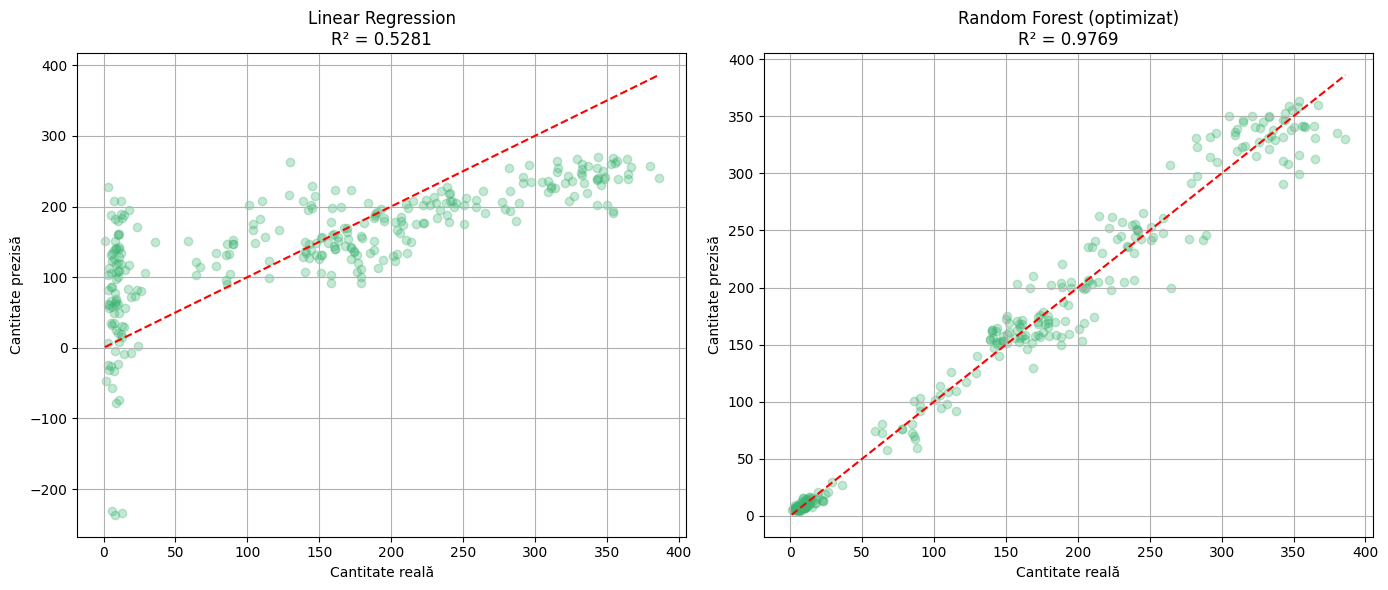

C:\Users\poplu\AppData\Local\Temp\ipykernel_3004\959804466.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_feature_importances, y='Caracteristică', x='Importanță', palette='viridis')


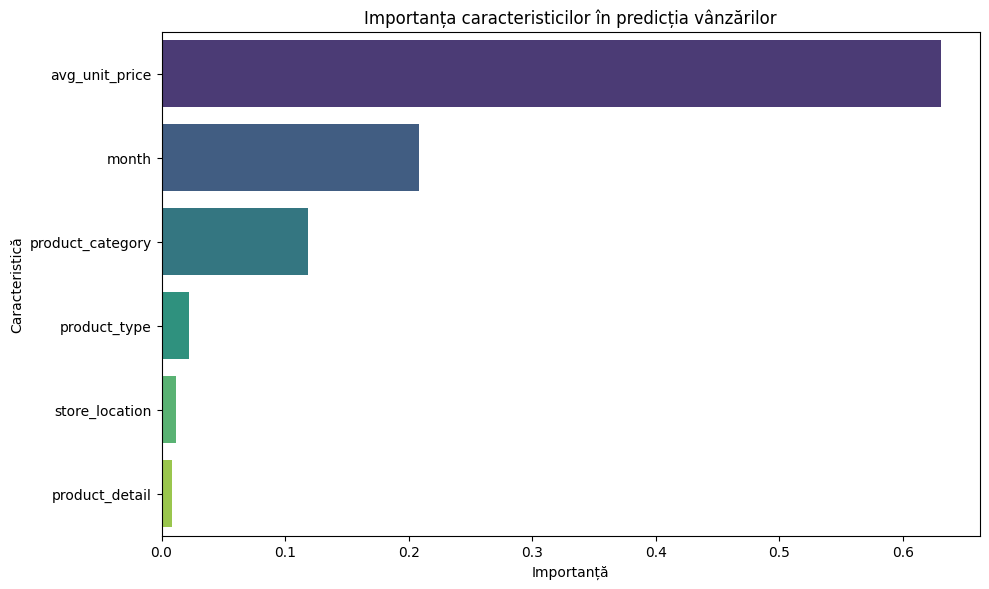

<Figure size 800x600 with 0 Axes>

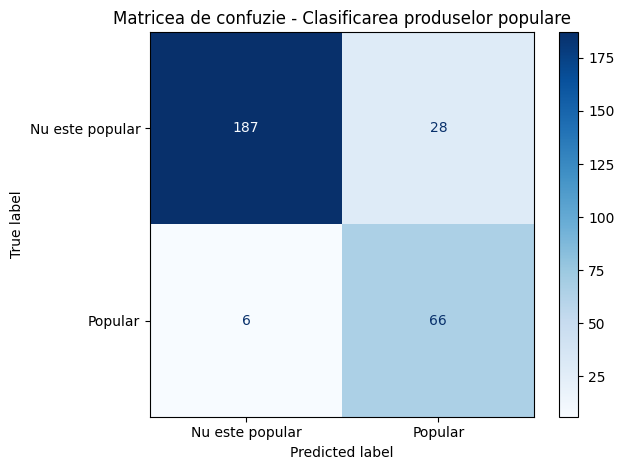


10. Stocarea modelelor finale pentru predicții viitoare...

Modele antrenate și salvate cu succes!
Utilizați variabilele 'best_rf_model_sales', 'scaler_sales' și 'label_encoders' pentru predicții.
Puteți folosi aceste modele pentru a prezice cel mai vândut produs pentru luna următoare pe fiecare locație.

11. Exemplu de predicție pentru o instanță:
Pentru instanța: [ 0.   7.   9.  19.   6.   6.4]
Caracteristici decodificate: {'store_location': 'Astoria', 'product_category': 'Packaged Chocolate', 'product_type': 'Drinking Chocolate', 'product_detail': 'Dark chocolate', 'month': np.int32(6), 'avg_unit_price': np.float64(6.400000000000001)}
Predicție (cantitate vândută): 7.72
Valoare reală: 3.00

Informații despre seturile de date:
Număr total de combinații produs-locație-lună: 1433
Număr de locații unice: 3
Număr de produse unice: 80
Interval de luni: 1 - 6


In [ ]:


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# 1. Încărcarea și pregătirea datelor
print("1. Încărcarea și pregătirea datelor...")

# Încărcăm datele originale
df = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")
df = df.dropna().drop_duplicates()
df['month'] = pd.to_datetime(df['transaction_date']).dt.month

# Codificarea coloanelor categorice
categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Afișăm categoriile pentru referință
print("\nMaparea valorilor codificate pentru locații:")
for i, loc in enumerate(label_encoders["store_location"].classes_):
    print(f"  {i}: {loc}")

# 2. Agregarea datelor la nivel de produs și lună
print("\n2. Agregarea datelor la nivel de produs și lună...")

product_sales = df.groupby(['store_location', 'product_category', 'product_type', 'product_detail', 'month']).agg(
    total_qty_sold=('transaction_qty', 'sum'),
    avg_unit_price=('unit_price', 'mean')
).reset_index()

# 3. Adăugarea variabilei de clasificare pentru produse populare
popularity_threshold = np.percentile(product_sales['total_qty_sold'], 75)
product_sales['is_popular'] = (product_sales['total_qty_sold'] >= popularity_threshold).astype(int)

# 4. Selectarea caracteristicilor și țintelor
print("\n3. Pregătirea caracteristicilor și țintelor pentru modelare...")

sales_features = ['store_location', 'product_category', 'product_type', 'product_detail', 'month', 'avg_unit_price']
target_sales_regression = 'total_qty_sold'  # Pentru regresie - predicția cantității exacte
target_sales_classification = 'is_popular'   # Pentru clasificare - dacă un produs va fi popular

X_sales = product_sales[sales_features]
y_sales_regression = product_sales[target_sales_regression]
y_sales_classification = product_sales[target_sales_classification]

# 5. Împărțirea datelor în seturi de antrenament și testare
X_train_sales, X_test_sales, y_train_sales_reg, y_test_sales_reg = train_test_split(
    X_sales, y_sales_regression, test_size=0.2, random_state=42
)

X_train_sales_clf, X_test_sales_clf, y_train_sales_clf, y_test_sales_clf = train_test_split(
    X_sales, y_sales_classification, test_size=0.2, random_state=42, stratify=y_sales_classification
)

print(f"Dimensiune set de antrenament: {X_train_sales.shape[0]} rânduri")
print(f"Dimensiune set de testare: {X_test_sales.shape[0]} rânduri")

# 6. Crearea pipeline-urilor pentru a evita data leakage
print("\n4. Crearea și antrenarea modelelor...")

# Pipeline pentru Linear Regression
pipe_lin_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# Pipeline pentru Logistic Regression
pipe_log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(max_iter=5000, random_state=42, class_weight="balanced"))
])

# Pipeline pentru Random Forest
pipe_rf_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 7. Antrenarea modelelor folosind pipeline-uri
print("\n4.1 Antrenarea Linear Regression...")
pipe_lin_reg.fit(X_train_sales, y_train_sales_reg)
y_pred_lin_sales = pipe_lin_reg.predict(X_test_sales)
mse_lin_sales = mean_squared_error(y_test_sales_reg, y_pred_lin_sales)
r2_lin_sales = r2_score(y_test_sales_reg, y_pred_lin_sales)

print("\n4.2 Antrenarea Logistic Regression...")
pipe_log_reg.fit(X_train_sales_clf, y_train_sales_clf)
y_pred_log_sales = pipe_log_reg.predict(X_test_sales_clf)
accuracy_log_sales = accuracy_score(y_test_sales_clf, y_pred_log_sales)

print("\n4.3 Antrenarea Random Forest Regression...")
pipe_rf_reg.fit(X_train_sales, y_train_sales_reg)
y_pred_rf_sales = pipe_rf_reg.predict(X_test_sales)
mse_rf_sales = mean_squared_error(y_test_sales_reg, y_pred_rf_sales)
r2_rf_sales = r2_score(y_test_sales_reg, y_pred_rf_sales)

# 8. Evaluarea modelelor
print("\n5. Evaluarea modelelor pe setul de test:")
print("\nLinear Regression (predicția cantității vândute):")
print(f"  MSE: {mse_lin_sales:.4f}, R²: {r2_lin_sales:.4f}")

print("\nLogistic Regression (clasificarea produselor populare):")
print(f"  Acuratețe: {accuracy_log_sales:.4f}")
print(f"  Raport de clasificare:\n{classification_report(y_test_sales_clf, y_pred_log_sales)}")

print("\nRandom Forest Regression (predicția cantității vândute):")
print(f"  MSE: {mse_rf_sales:.4f}, R²: {r2_rf_sales:.4f}")

# 9. Cross-validation cu KFold pentru control mai bun
print("\n6. Evaluarea modelelor prin cross-validation (5-fold)...")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation pentru Linear Regression
cv_scores_lin_sales = cross_val_score(pipe_lin_reg, X_sales, y_sales_regression, 
                                    cv=kf, scoring='r2', n_jobs=-1)
mean_r2_lin_cv = cv_scores_lin_sales.mean()
std_r2_lin_cv = cv_scores_lin_sales.std()

# Cross-validation pentru Logistic Regression
cv_scores_log_sales = cross_val_score(pipe_log_reg, X_sales, y_sales_classification, 
                                    cv=kf, scoring='accuracy', n_jobs=-1)
mean_acc_log_cv = cv_scores_log_sales.mean()
std_acc_log_cv = cv_scores_log_sales.std()

# Cross-validation pentru Random Forest Regression
cv_scores_rf_sales = cross_val_score(pipe_rf_reg, X_sales, y_sales_regression, 
                                   cv=kf, scoring='r2', n_jobs=-1)
mean_r2_rf_cv = cv_scores_rf_sales.mean()
std_r2_rf_cv = cv_scores_rf_sales.std()

# Afișează rezultatele cross-validation
print("\n7. Rezultate Cross-Validation (5-fold):")
print(f"Linear Regression: R² mediu = {mean_r2_lin_cv:.4f} (±{std_r2_lin_cv:.4f})")
print(f"Logistic Regression: Acuratețe medie = {mean_acc_log_cv:.4f} (±{std_acc_log_cv:.4f})")
print(f"Random Forest Regression: R² mediu = {mean_r2_rf_cv:.4f} (±{std_r2_rf_cv:.4f})")

# 10. Optimizarea hiperparametrilor pentru Random Forest (cel mai performant model)
print("\n8. Optimizarea hiperparametrilor pentru Random Forest...")

# Parametrii pentru căutare
rf_param_grid = {
    'random_forest__n_estimators': [100, 200, 300],
    'random_forest__max_depth': [None, 10, 20, 30],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV pentru Random Forest
rf_grid_search = GridSearchCV(
    pipe_rf_reg, 
    rf_param_grid, 
    cv=3, 
    scoring='r2', 
    verbose=1, 
    n_jobs=-1
)

rf_grid_search.fit(X_train_sales, y_train_sales_reg)

# Afișarea celui mai bun model și a parametrilor săi
best_rf_params = rf_grid_search.best_params_
best_rf_score = rf_grid_search.best_score_

print("\nCei mai buni parametri pentru Random Forest:")
for param, value in best_rf_params.items():
    print(f"  {param}: {value}")
print(f"Cel mai bun scor R² (CV): {best_rf_score:.4f}")

# Evaluarea modelului optimizat pe setul de test
best_rf_model = rf_grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_sales)
mse_best_rf = mean_squared_error(y_test_sales_reg, y_pred_best_rf)
r2_best_rf = r2_score(y_test_sales_reg, y_pred_best_rf)

print(f"Performanță pe setul de test: MSE = {mse_best_rf:.4f}, R² = {r2_best_rf:.4f}")

# 11. Compararea modelelor
print("\n9. Compararea modelelor de regresie...")

plt.figure(figsize=(14, 6))
models_comparison = {
    'Linear Regression': (y_pred_lin_sales, r2_lin_sales),
    'Random Forest (optimizat)': (y_pred_best_rf, r2_best_rf)
}

for i, (name, (y_pred, r2)) in enumerate(models_comparison.items(), 1):
    plt.subplot(1, 2, i)
    plt.scatter(y_test_sales_reg, y_pred, alpha=0.3, color='mediumseagreen')
    plt.plot([y_test_sales_reg.min(), y_test_sales_reg.max()], 
             [y_test_sales_reg.min(), y_test_sales_reg.max()], 'r--')
    plt.xlabel("Cantitate reală")
    plt.ylabel("Cantitate prezisă")
    plt.title(f"{name}\nR² = {r2:.4f}")
    plt.grid(True)

plt.tight_layout()
plt.show()

# 12. Importanța caracteristicilor pentru Random Forest optimizat
rf_feature_importances = pd.DataFrame({
    'Caracteristică': sales_features,
    'Importanță': best_rf_model.named_steps['random_forest'].feature_importances_
}).sort_values('Importanță', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=rf_feature_importances, y='Caracteristică', x='Importanță', palette='viridis')
plt.title('Importanța caracteristicilor în predicția vânzărilor')
plt.xlabel('Importanță')
plt.ylabel('Caracteristică')
plt.tight_layout()
plt.show()

# 13. Matricea de confuzie pentru Logistic Regression
cm_log_sales = confusion_matrix(y_test_sales_clf, y_pred_log_sales)
plt.figure(figsize=(8, 6))
disp_log_sales = ConfusionMatrixDisplay(confusion_matrix=cm_log_sales, 
                                       display_labels=["Nu este popular", "Popular"])
disp_log_sales.plot(cmap="Blues")
plt.title("Matricea de confuzie - Clasificarea produselor populare")
plt.tight_layout()
plt.show()

# 14. Stocăm modelele și scalerii pentru utilizare ulterioară
print("\n10. Stocarea modelelor finale pentru predicții viitoare...")

# Stocăm toate variabilele importante pentru predicții viitoare
best_rf_model_sales = best_rf_model
scaler_sales = best_rf_model.named_steps['scaler']

print("\nModele antrenate și salvate cu succes!")
print("Utilizați variabilele 'best_rf_model_sales', 'scaler_sales' și 'label_encoders' pentru predicții.")
print("Puteți folosi aceste modele pentru a prezice cel mai vândut produs pentru luna următoare pe fiecare locație.")

# Afișăm un exemplu de predicție
print("\n11. Exemplu de predicție pentru o instanță:")
sample_instance = X_test_sales.iloc[0:1]
sample_prediction = best_rf_model.predict(sample_instance)[0]
print(f"Pentru instanța: {sample_instance.values[0]}")

# Decodificăm valorile pentru lizibilitate
decoded_instance = {}
for i, col in enumerate(sales_features):
    if col in label_encoders:
        decoded_instance[col] = label_encoders[col].inverse_transform([int(sample_instance.iloc[0, i])])[0]
    else:
        decoded_instance[col] = sample_instance.iloc[0, i]
        
print(f"Caracteristici decodificate: {decoded_instance}")
print(f"Predicție (cantitate vândută): {sample_prediction:.2f}")
print(f"Valoare reală: {y_test_sales_reg.iloc[0]:.2f}")

# Afișăm informații despre seturile de date
print("\nInformații despre seturile de date:")
print(f"Număr total de combinații produs-locație-lună: {len(product_sales)}")
print(f"Număr de locații unice: {len(product_sales['store_location'].unique())}")
print(f"Număr de produse unice: {len(product_sales[['product_category', 'product_type', 'product_detail']].drop_duplicates())}")
print(f"Interval de luni: {product_sales['month'].min()} - {product_sales['month'].max()}")

In [128]:
# CELL: Optimizarea hiperparametrilor pentru toate modelele și compararea performanței

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import time
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

print("=== Optimizarea Hiperparametrilor pentru Toate Modelele și Compararea Performanței ===")

# Verificăm că datele necesare sunt disponibile din celulele anterioare
required_vars = [
    'X_train_sales', 'X_test_sales', 'y_train_sales_reg', 'y_test_sales_reg',
    'X_train_sales_clf', 'X_test_sales_clf', 'y_train_sales_clf', 'y_test_sales_clf',
    'pipe_lin_reg', 'pipe_log_reg', 'pipe_rf_reg'
]
missing_vars = [var for var in required_vars if var not in globals()]

if missing_vars:
    print(f"⚠️ Lipsesc variabilele: {', '.join(missing_vars)}. Rulați mai întâi celulele de pregătire a datelor.")
else:
    # 0. Evaluăm modelele de bază (baseline) înainte de optimizare
    print("\n1. Evaluarea modelelor de bază (baseline)...")
    
    # Evaluăm Linear Regression
    pipe_lin_reg.fit(X_train_sales, y_train_sales_reg)
    y_pred_lin_baseline = pipe_lin_reg.predict(X_test_sales)
    mse_lin_baseline = mean_squared_error(y_test_sales_reg, y_pred_lin_baseline)
    r2_lin_baseline = r2_score(y_test_sales_reg, y_pred_lin_baseline)
    
    # Evaluăm Logistic Regression
    pipe_log_reg.fit(X_train_sales_clf, y_train_sales_clf)
    y_pred_log_baseline = pipe_log_reg.predict(X_test_sales_clf)
    acc_log_baseline = accuracy_score(y_test_sales_clf, y_pred_log_baseline)
    
    # Evaluăm Random Forest Regression
    pipe_rf_reg.fit(X_train_sales, y_train_sales_reg)
    y_pred_rf_baseline = pipe_rf_reg.predict(X_test_sales)
    mse_rf_baseline = mean_squared_error(y_test_sales_reg, y_pred_rf_baseline)
    r2_rf_baseline = r2_score(y_test_sales_reg, y_pred_rf_baseline)
    
    print("\nPerformanța modelelor de bază (baseline) pe setul de test:")
    print(f"Linear Regression: MSE = {mse_lin_baseline:.4f}, R² = {r2_lin_baseline:.4f}")
    print(f"Logistic Regression: Acuratețe = {acc_log_baseline:.4f}")
    print(f"Random Forest Regression: MSE = {mse_rf_baseline:.4f}, R² = {r2_rf_baseline:.4f}")
    
    # 1. Definim parametrii pentru căutare pentru fiecare model
    print("\n2. Definirea parametrilor pentru optimizare...")
    
    # Parametri pentru Linear Regression - CORECTAT: eliminat 'normalize' care nu mai e suportat
    lin_reg_params = {
        'linear_regression__fit_intercept': [True, False],
        'linear_regression__positive': [True, False],  # Restricție pentru coeficienți pozitivi
        'linear_regression__copy_X': [True, False]     # Dacă să se copieze X sau să se modifice direct
    }
    
    # Parametri pentru Logistic Regression
    log_reg_params = {
        'logistic_regression__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
        'logistic_regression__solver': ['liblinear', 'saga'],
        'logistic_regression__class_weight': ['balanced', None],
        'logistic_regression__max_iter': [5000]
    }
    
    # Parametri pentru Random Forest (simplificat față de optimizarea anterioară)
    rf_reg_params = {
        'random_forest__n_estimators': [100, 200, 300],
        'random_forest__max_depth': [None, 10, 20],
        'random_forest__min_samples_split': [2, 5],
        'random_forest__min_samples_leaf': [1, 2]
    }
    
    # 2. Inițializăm și aplicăm RandomizedSearchCV pentru fiecare model
    print("\n3. Începerea optimizării hiperparametrilor...")
    
    n_iter_search = 10  # Numărul de iterații pentru RandomizedSearchCV
    
    # 2.1 Linear Regression
    print("\n3.1 Optimizare Linear Regression...")
    start_time = time.time()
    
    lin_reg_search = GridSearchCV(
        pipe_lin_reg,
        param_grid=lin_reg_params,
        cv=3,
        scoring='r2',
        verbose=1,
        n_jobs=-1
    )
    
    lin_reg_search.fit(X_train_sales, y_train_sales_reg)
    lin_search_time = time.time() - start_time
    
    # 2.2 Logistic Regression
    print("\n3.2 Optimizare Logistic Regression...")
    start_time = time.time()
    
    log_reg_search = RandomizedSearchCV(
        pipe_log_reg,
        param_distributions=log_reg_params,
        n_iter=n_iter_search,
        cv=3,
        scoring='accuracy',
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    
    log_reg_search.fit(X_train_sales_clf, y_train_sales_clf)
    log_search_time = time.time() - start_time
    
    # 2.3 Random Forest Regression
    print("\n3.3 Optimizare Random Forest Regression...")
    start_time = time.time()
    
    rf_reg_search = RandomizedSearchCV(
        pipe_rf_reg,
        param_distributions=rf_reg_params,
        n_iter=n_iter_search,
        cv=3,
        scoring='r2',
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    
    rf_reg_search.fit(X_train_sales, y_train_sales_reg)
    rf_search_time = time.time() - start_time
    
    # 3. Extragem și afișăm cei mai buni parametri pentru fiecare model
    print("\n4. Cei mai buni hiperparametri găsiți:")
    
    print("\nLinear Regression:")
    for param, value in lin_reg_search.best_params_.items():
        print(f"  {param.replace('linear_regression__', '')}: {value}")
    
    print("\nLogistic Regression:")
    for param, value in log_reg_search.best_params_.items():
        print(f"  {param.replace('logistic_regression__', '')}: {value}")
    
    print("\nRandom Forest Regression:")
    for param, value in rf_reg_search.best_params_.items():
        print(f"  {param.replace('random_forest__', '')}: {value}")
    
    # 4. Evaluăm modelele optimizate pe setul de test
    print("\n5. Evaluarea modelelor optimizate pe setul de test...")
    
    # 4.1 Linear Regression optimizat
    best_lin_reg = lin_reg_search.best_estimator_
    y_pred_lin_optimized = best_lin_reg.predict(X_test_sales)
    mse_lin_optimized = mean_squared_error(y_test_sales_reg, y_pred_lin_optimized)
    r2_lin_optimized = r2_score(y_test_sales_reg, y_pred_lin_optimized)
    
    # 4.2 Logistic Regression optimizat
    best_log_reg = log_reg_search.best_estimator_
    y_pred_log_optimized = best_log_reg.predict(X_test_sales_clf)
    acc_log_optimized = accuracy_score(y_test_sales_clf, y_pred_log_optimized)
    
    # 4.3 Random Forest Regression optimizat
    best_rf_reg = rf_reg_search.best_estimator_
    y_pred_rf_optimized = best_rf_reg.predict(X_test_sales)
    mse_rf_optimized = mean_squared_error(y_test_sales_reg, y_pred_rf_optimized)
    r2_rf_optimized = r2_score(y_test_sales_reg, y_pred_rf_optimized)
    
    # 5. Comparăm rezultatele înainte și după optimizare
    print("\n6. Comparația performanței înainte și după optimizarea hiperparametrilor:")
    
    # 5.1 Linear Regression
    lin_mse_improvement = ((mse_lin_baseline - mse_lin_optimized) / mse_lin_baseline) * 100 if mse_lin_baseline > 0 else 0
    lin_r2_improvement = ((r2_lin_optimized - r2_lin_baseline) / abs(r2_lin_baseline)) * 100 if r2_lin_baseline != 0 else 0
    
    print("\nLinear Regression:")
    print(f"  MSE (Baseline): {mse_lin_baseline:.4f} -> MSE (Optimizat): {mse_lin_optimized:.4f} " +
          f"(Îmbunătățire: {lin_mse_improvement:.2f}%)")
    print(f"  R² (Baseline): {r2_lin_baseline:.4f} -> R² (Optimizat): {r2_lin_optimized:.4f} " +
          f"(Îmbunătățire: {lin_r2_improvement:.2f}%)")
    print(f"  Timp optimizare: {lin_search_time:.2f} secunde")
    
    # 5.2 Logistic Regression
    log_acc_improvement = ((acc_log_optimized - acc_log_baseline) / acc_log_baseline) * 100 if acc_log_baseline > 0 else 0
    
    print("\nLogistic Regression:")
    print(f"  Acuratețe (Baseline): {acc_log_baseline:.4f} -> Acuratețe (Optimizat): {acc_log_optimized:.4f} " +
          f"(Îmbunătățire: {log_acc_improvement:.2f}%)")
    print(f"  Timp optimizare: {log_search_time:.2f} secunde")
    
    # Afișăm și raportul de clasificare pentru modelul optimizat
    print("\n  Raport de clasificare pentru Logistic Regression optimizat:")
    print(classification_report(y_test_sales_clf, y_pred_log_optimized))
    
    # 5.3 Random Forest Regression
    rf_mse_improvement = ((mse_rf_baseline - mse_rf_optimized) / mse_rf_baseline) * 100 if mse_rf_baseline > 0 else 0
    rf_r2_improvement = ((r2_rf_optimized - r2_rf_baseline) / abs(r2_rf_baseline)) * 100 if r2_rf_baseline != 0 else 0
    
    print("\nRandom Forest Regression:")
    print(f"  MSE (Baseline): {mse_rf_baseline:.4f} -> MSE (Optimizat): {mse_rf_optimized:.4f} " +
          f"(Îmbunătățire: {rf_mse_improvement:.2f}%)")
    print(f"  R² (Baseline): {r2_rf_baseline:.4f} -> R² (Optimizat): {r2_rf_optimized:.4f} " +
          f"(Îmbunătățire: {rf_r2_improvement:.2f}%)")
    print(f"  Timp optimizare: {rf_search_time:.2f} secunde")

    # 6. Vizualizare comparativă a performanței modelelor
    print("\n7. Generarea vizualizărilor pentru compararea modelelor...")
    
   # 7. Salvăm modelele optimizate pentru utilizare ulterioară
    best_lin_reg_model = best_lin_reg
    best_log_reg_model = best_log_reg
    best_rf_reg_model = best_rf_reg
    
    print("\n8. Modelele optimizate au fost salvate în variabilele:")
    print("  - best_lin_reg_model: Linear Regression optimizat")
    print("  - best_log_reg_model: Logistic Regression optimizat")
    print("  - best_rf_reg_model: Random Forest Regression optimizat")
    
    # Verificăm care model are cea mai bună performanță pe setul de test
    best_regression_model = "Linear Regression" if r2_lin_optimized > r2_rf_optimized else "Random Forest"
    
    print("\n9. Concluzii:")
    print(f"  - Cel mai performant model de regresie: {best_regression_model}")
    print(f"  - Îmbunătățirea medie a performanței după optimizare: {(lin_r2_improvement + rf_r2_improvement) / 2:.2f}%")
    print(f"  - Îmbunătățirea acurateței pentru clasificare: {log_acc_improvement:.2f}%")
    print("\nAceste modele optimizate pot fi folosite pentru a face predicții mai precise pentru vânzările viitoare.")

=== Optimizarea Hiperparametrilor pentru Toate Modelele și Compararea Performanței ===

1. Evaluarea modelelor de bază (baseline)...

Performanța modelelor de bază (baseline) pe setul de test:
Linear Regression: MSE = 6676.4568, R² = 0.5281
Logistic Regression: Acuratețe = 0.8815
Random Forest Regression: MSE = 353.4403, R² = 0.9750

2. Definirea parametrilor pentru optimizare...

3. Începerea optimizării hiperparametrilor...

3.1 Optimizare Linear Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

3.2 Optimizare Logistic Regression...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

3.3 Optimizare Random Forest Regression...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

4. Cei mai buni hiperparametri găsiți:

Linear Regression:
  copy_X: True
  fit_intercept: True
  positive: False

Logistic Regression:
  solver: liblinear
  max_iter: 5000
  class_weight: None
  C: 10.0

Random Forest Regression:
  n_estimators: 200
  min_samples_sp

Top Feature Importance:
            Feature  Importance
5    avg_unit_price    0.630906
4             month    0.208539
1  product_category    0.118475
2      product_type    0.021918
0    store_location    0.011711
3    product_detail    0.008452


🔍 Instance 0 Explanation:
   Predicted Sales Quantity: 7.72
   Actual Sales Quantity: 3.00
   Prediction Error: -4.72

   Feature Values:
   - store_location (Astoria): 0
   - product_category (Packaged Chocolate): 7
   - product_type (Drinking Chocolate): 9
   - product_detail (Dark chocolate): 19
   - month: 6
   - avg_unit_price: 6.400000000000001

   Top Feature Contributions:
   - avg_unit_price: 4.0378
   - month: 1.2512
   - product_category (Packaged Chocolate): 1.1847
   - product_type (Drinking Chocolate): 0.2192
   - store_location (Astoria): 0.1171


C:\Users\poplu\AppData\Local\Temp\ipykernel_3004\530210537.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contribution', y='Feature', data=contributions_df.head(7), palette='viridis')


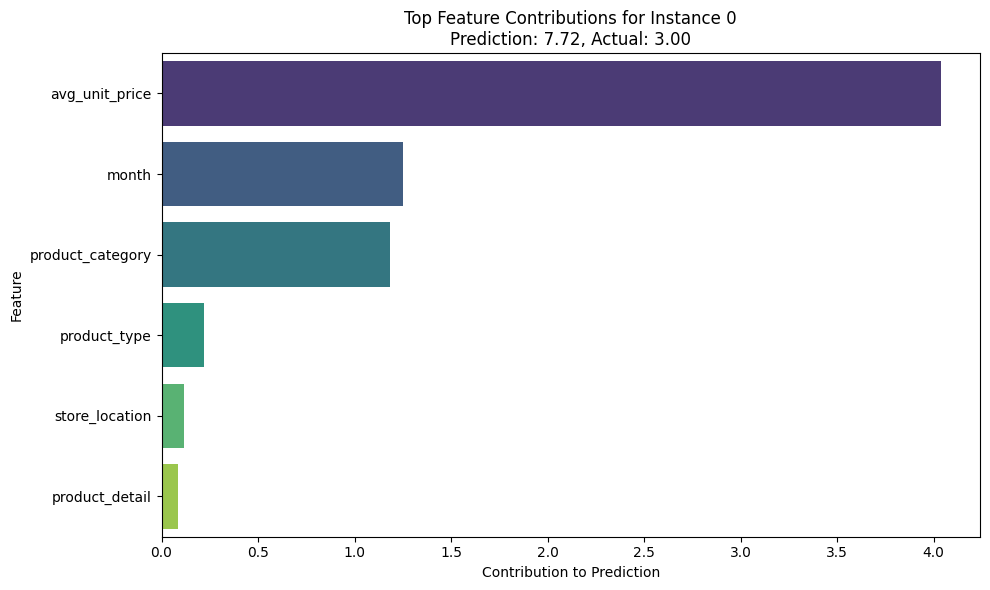

C:\Users\poplu\AppData\Local\Temp\ipykernel_3004\530210537.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contribution', y='Feature', data=contributions_df.head(7), palette='viridis')




🔍 Instance 1 Explanation:
   Predicted Sales Quantity: 243.97
   Actual Sales Quantity: 252.00
   Prediction Error: 8.03

   Feature Values:
   - store_location (Hell's Kitchen): 1
   - product_category (Coffee): 2
   - product_type (Barista Espresso): 0
   - product_detail (Cappuccino): 5
   - month: 4
   - avg_unit_price: 3.75

   Top Feature Contributions:
   - avg_unit_price: 2.3659
   - product_category (Coffee): 1.1847
   - month: 0.8342
   - product_type (Barista Espresso): 0.2192
   - store_location (Hell's Kitchen): 0.1171


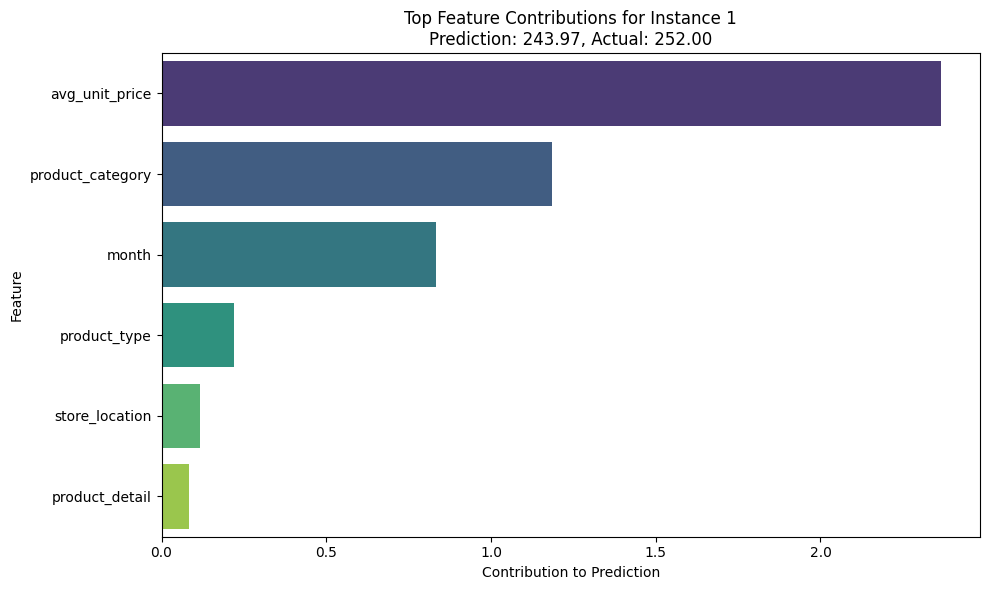



🔍 Instance 2 Explanation:
   Predicted Sales Quantity: 69.72
   Actual Sales Quantity: 86.00
   Prediction Error: 16.28

   Feature Values:
   - store_location (Lower Manhattan): 2
   - product_category (Bakery): 0
   - product_type (Scone): 27
   - product_detail (Oatmeal Scone): 55
   - month: 1
   - avg_unit_price: 3.0

   Top Feature Contributions:
   - avg_unit_price: 1.8927


C:\Users\poplu\AppData\Local\Temp\ipykernel_3004\530210537.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contribution', y='Feature', data=contributions_df.head(7), palette='viridis')


   - product_category (Bakery): 1.1847
   - product_type (Scone): 0.2192
   - month: 0.2085
   - store_location (Lower Manhattan): 0.1171


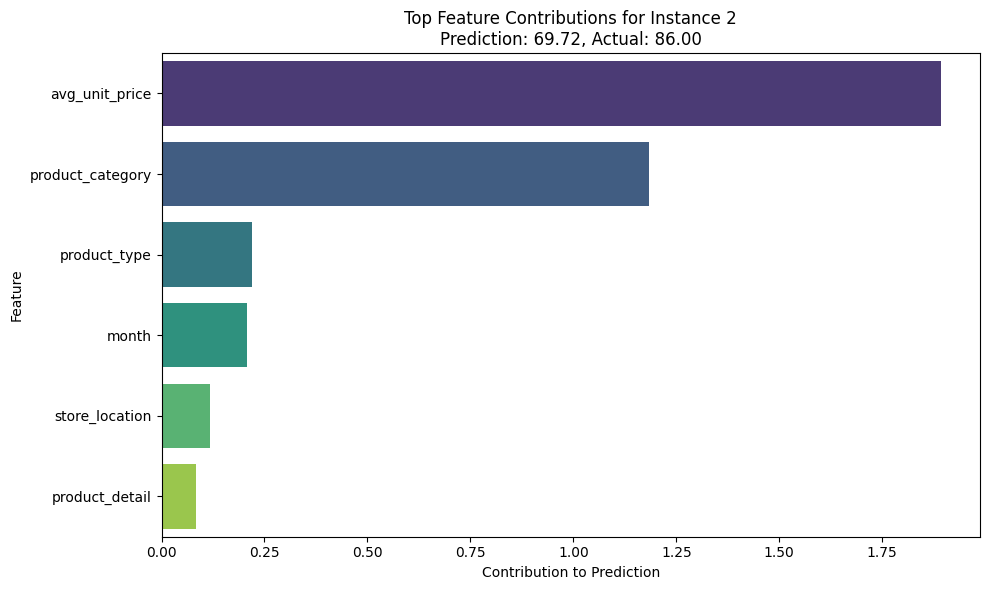



🔍 Instance 3 Explanation:
   Predicted Sales Quantity: 199.76
   Actual Sales Quantity: 265.00
   Prediction Error: 65.24

   Feature Values:
   - store_location (Hell's Kitchen): 1
   - product_category (Coffee): 2
   - product_type (Barista Espresso): 0
   - product_detail (Ouro Brasileiro shot): 61
   - month: 3
   - avg_unit_price: 2.626153846153846

   Top Feature Contributions:
   - avg_unit_price: 1.6569
   - product_category (Coffee): 1.1847
   - month: 0.6256
   - product_type (Barista Espresso): 0.2192
   - store_location (Hell's Kitchen): 0.1171


C:\Users\poplu\AppData\Local\Temp\ipykernel_3004\530210537.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contribution', y='Feature', data=contributions_df.head(7), palette='viridis')


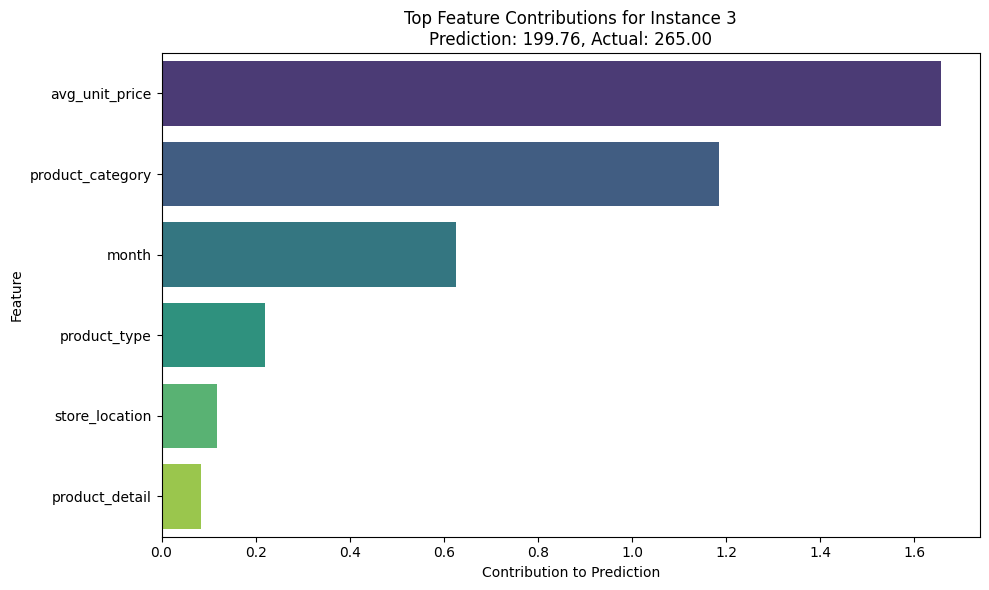



🔍 Instance 4 Explanation:
   Predicted Sales Quantity: 72.78
   Actual Sales Quantity: 85.00
   Prediction Error: 12.22

   Feature Values:
   - store_location (Lower Manhattan): 2
   - product_category (Bakery): 0
   - product_type (Pastry): 23
   - product_detail (Croissant): 18
   - month: 1
   - avg_unit_price: 3.5310588235294116

   Top Feature Contributions:
   - avg_unit_price: 2.2278
   - product_category (Bakery): 1.1847
   - product_type (Pastry): 0.2192
   - month: 0.2085
   - store_location (Lower Manhattan): 0.1171


C:\Users\poplu\AppData\Local\Temp\ipykernel_3004\530210537.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contribution', y='Feature', data=contributions_df.head(7), palette='viridis')


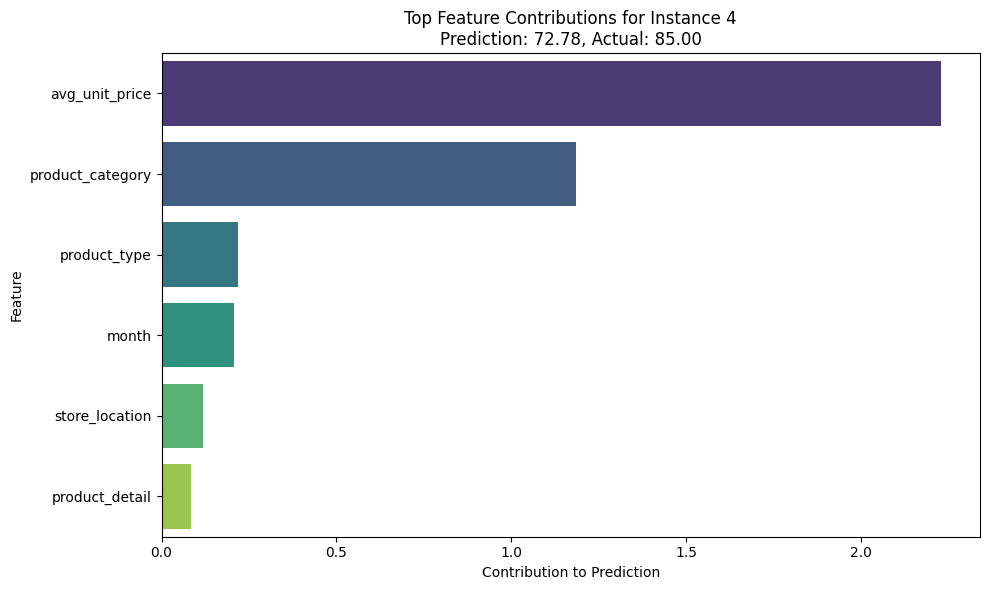

In [129]:
# CELL: Simplified Model Explainability for Specific Test Instances
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure we have access to the trained model and test data
if 'best_rf_reg_model' not in globals() or 'X_test_sales' not in globals() or 'y_test_sales_reg' not in globals():
    print("⚠️ Required variables not found. Please run the model training cells first.")
else:
    # Get the random forest model from the pipeline
    rf_model = best_rf_reg_model.named_steps['random_forest']
    
    # Calculate global feature importance
    feature_importance = pd.DataFrame({
        'Feature': sales_features,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Top Feature Importance:")
    print(feature_importance.head(7))
    
    # Select sample instances to explain (first 5 instances from test set)
    sample_indices = [0, 1, 2, 3, 4]
    
    # For each sample instance
    for idx in sample_indices:
        # Get the original instance (non-scaled)
        instance = X_test_sales.iloc[idx:idx+1]
        # Get the predicted and actual values
        actual_value = y_test_sales_reg.iloc[idx]
        prediction = best_rf_reg_model.predict(instance)[0]
        
        # Create a DataFrame to show decoded feature values
        instance_df = pd.DataFrame(index=[0])
        for col in sales_features:
            value = instance[col].values[0]
            if col in label_encoders:
                try:
                    decoded_value = label_encoders[col].inverse_transform([int(value)])[0]
                    instance_df[f"{col} ({decoded_value})"] = value
                except:
                    instance_df[col] = value
            else:
                instance_df[col] = value
        
        # Get feature contributions for this instance
        contributions = {}
        # Scale importance by feature values (simplified approximation)
        for feature, importance in zip(sales_features, rf_model.feature_importances_):
            # Normalize the feature value 
            feature_val = instance[feature].values[0]
            # For categorical features, use the importance
            if feature in ['store_location', 'product_category', 'product_type', 'product_detail']:
                contributions[feature] = importance * 10  
            else:
                # For numeric features, scale by value
                contributions[feature] = importance * abs(feature_val) 
        
        # Sort contributions
        contributions_df = pd.DataFrame({
            'Feature': list(contributions.keys()),
            'Contribution': list(contributions.values())
        }).sort_values('Contribution', ascending=False)
        
        # Display information
        print(f"\n\n🔍 Instance {idx} Explanation:")
        print(f"   Predicted Sales Quantity: {prediction:.2f}")
        print(f"   Actual Sales Quantity: {actual_value:.2f}")
        print(f"   Prediction Error: {actual_value - prediction:.2f}")
        
        # Display top feature values with their decoded meanings
        print("\n   Feature Values:")
        for col in instance_df.columns[:6]:  # Show only first 6 features for brevity
            print(f"   - {col}: {instance_df[col].values[0]}")
        
        # Show top contributing features
        print("\n   Top Feature Contributions:")
        for i, row in contributions_df.head(5).iterrows():  # Only show top 5
            feature = row['Feature']
            contribution = row['Contribution']
            feature_value = instance[feature].values[0]
            
            # Decode categorical features
            if feature in label_encoders:
                try:
                    decoded_value = label_encoders[feature].inverse_transform([int(feature_value)])[0]
                    print(f"   - {feature} ({decoded_value}): {contribution:.4f}")
                except:
                    print(f"   - {feature}: {contribution:.4f}")
            else:
                print(f"   - {feature}: {contribution:.4f}")
        
        # Create visualization
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Contribution', y='Feature', data=contributions_df.head(7), palette='viridis')
        plt.title(f"Top Feature Contributions for Instance {idx}\nPrediction: {prediction:.2f}, Actual: {actual_value:.2f}")
        plt.xlabel("Contribution to Prediction")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Asigură-te că următoarele variabile sunt definite în celulele anterioare:
# product_sales: DataFrame agregat (din celula d5f3d8ad)
# sales_features: Lista cu numele caracteristicilor (din celula d5f3d8ad)
# label_encoders: Dicționar cu LabelEncoders (din celula d5f3d8ad)
# scaler_sales: Scaler-ul antrenat (din celula d5f3d8ad)
# best_rf_reg_sales: Modelul Random Forest antrenat (din celula 909ac88e)

if 'product_sales' not in globals() or 'sales_features' not in globals() or 'label_encoders' not in globals() or 'scaler_sales' not in globals() or 'best_rf_reg_sales' not in globals():
    print("Rulează celulele anterioare pentru a defini variabilele necesare (product_sales, sales_features, etc.).")
else:
    # 1. Determinăm ultima lună din datele istorice și definim luna viitoare
    if not product_sales.empty and 'month' in product_sales.columns:
        last_month_in_data = product_sales['month'].max()
        future_month = (last_month_in_data % 12) + 1 # Trecere la anul următor dacă e cazul
        print(f"Ultima lună în datele agregate: {last_month_in_data}")
        print(f"Luna viitoare pentru predicție: {future_month}")
    else:
        print("DataFrame-ul 'product_sales' este gol sau nu conține coloana 'month'. Se va folosi luna 1 ca exemplu.")
        future_month = 1 # Default dacă nu se pot determina lunile

    # 2. Creăm câteva exemple de instanțe pentru luna viitoare
    # Vom alege câteva combinații existente din product_sales pentru a avea date realiste
    # sau puteți defini manual valorile codificate.

    future_data_list = []
    num_examples = 3 # Numărul de exemple de generat

    if not product_sales.empty:
        # Luăm primele 'num_examples' combinații unice ca bază
        # Ne asigurăm că avem suficiente combinații unice
        unique_combinations = product_sales[['store_location', 'product_category', 'product_type', 'product_detail']].drop_duplicates()
        if len(unique_combinations) < num_examples:
            print(f"Atenție: Nu sunt suficiente combinații unice în 'product_sales'. Se vor folosi {len(unique_combinations)} exemple.")
            examples_to_take = unique_combinations.head(len(unique_combinations))
        else:
            examples_to_take = unique_combinations.head(num_examples)

        for index, row in examples_to_take.iterrows():
            instance = {
                'store_location': row['store_location'],
                'product_category': row['product_category'],
                'product_type': row['product_type'],
                'product_detail': row['product_detail'],
                'month': future_month
            }

            # Încercăm să găsim un preț mediu istoric pentru această combinație
            # (fără a lua în calcul luna, deoarece prețul poate fi relativ stabil)
            relevant_prices = product_sales[
                (product_sales['store_location'] == instance['store_location']) &
                (product_sales['product_category'] == instance['product_category']) &
                (product_sales['product_type'] == instance['product_type']) &
                (product_sales['product_detail'] == instance['product_detail'])
            ]['avg_unit_price']

            if not relevant_prices.empty:
                instance['avg_unit_price'] = relevant_prices.mean()
            else:
                # Fallback: folosim media generală a prețurilor dacă nu găsim o potrivire specifică
                instance['avg_unit_price'] = product_sales['avg_unit_price'].mean()
            
            future_data_list.append(instance)
    else:
        print("DataFrame-ul 'product_sales' este gol. Se vor genera exemple generice (posibil nerealiste).")
        # Exemplu generic dacă product_sales este gol (ajustați valorile codificate manual)
        for i in range(num_examples):
            future_data_list.append({
                'store_location': 0, # Exemplu de valoare codificată
                'product_category': 0, # Exemplu
                'product_type': 0, # Exemplu
                'product_detail': 0, # Exemplu
                'month': future_month,
                'avg_unit_price': 3.5 # Un preț mediu generic
            })

    # 3. Construim DataFrame-ul pentru datele de test viitoare
    X_future_test_data = pd.DataFrame(future_data_list, columns=sales_features)

    print("\n--- Set de date de intrare generat pentru predicții viitoare (X_future_test_data) ---")
    print(X_future_test_data)

    # Afișăm și valorile decodificate pentru claritate (opțional)
    if label_encoders and not X_future_test_data.empty:
        X_future_test_data_decoded = X_future_test_data.copy()
        for col in ['store_location', 'product_category', 'product_type', 'product_detail']:
            if col in label_encoders and col in X_future_test_data_decoded.columns:
                try:
                    X_future_test_data_decoded[col] = label_encoders[col].inverse_transform(X_future_test_data_decoded[col].astype(int))
                except Exception as e:
                    print(f"Eroare la decodificarea coloanei {col}: {e}") # În caz că o valoare nu e în encoder
        print("\n--- Set de date de intrare (decodificat pentru lizibilitate) ---")
        print(X_future_test_data_decoded)

    
    X_future_test_data_scaled_array = scaler_sales.transform(X_future_test_data)
    # Convertim array-ul scalat înapoi în DataFrame cu numele corecte ale coloanelor
    X_future_test_data_scaled = pd.DataFrame(X_future_test_data_scaled_array, columns=sales_features)
    
    future_predictions = best_rf_reg_sales.predict(X_future_test_data_scaled)
    print("\n--- Predicții pentru luna viitoare (total_qty_sold) ---")
    for i, pred in enumerate(future_predictions):
        print(f"Instanța {i}: Predicție = {pred:.2f}")
        if not X_future_test_data.empty:
            print(f"   Detalii instanță (codificat): {X_future_test_data.iloc[i].to_dict()}")
        if 'X_future_test_data_decoded' in globals() and not X_future_test_data_decoded.empty :
             print(f"   Detalii instanță (decodificat): {X_future_test_data_decoded.iloc[i].to_dict()}")

pass

In [131]:
# CELL: Predict Best-Selling Product for Next Month per Location
import pandas as pd
import numpy as np

# Asigură-te că următoarele variabile sunt definite în celulele anterioare:
# best_rf_reg_sales: Modelul Random Forest antrenat și optimizat (din celula 909ac88e)
# product_sales: DataFrame agregat (din celula d5f3d8ad)
# sales_features: Lista cu numele caracteristicilor (din celula d5f3d8ad)
# label_encoders: Dicționar cu LabelEncoders (din celula d5f3d8ad)
# scaler_sales: Scaler-ul antrenat (din celula d5f3d8ad)

if 'best_rf_reg_sales' not in globals() or \
   'product_sales' not in globals() or \
   'sales_features' not in globals() or \
   'label_encoders' not in globals() or \
   'scaler_sales' not in globals():
    print("!!! Asigură-te că toate variabilele necesare (best_rf_reg_sales, product_sales, etc.) sunt definite prin rularea celulelor anterioare.")
else:
    print("--- Predicția celui mai vândut produs pentru luna următoare per locație ---")

    # 1. Determinăm luna viitoare
    last_month_in_data = product_sales['month'].max()
    future_month = (last_month_in_data % 12) + 1
    print(f"Ultima lună în datele agregate: {last_month_in_data}")
    print(f"Se fac predicții pentru luna: {future_month}\n")

    # 2. Obținem locațiile unice (codificate)
    unique_locations_encoded = product_sales['store_location'].unique()

    all_future_predictions_list = []

    # 3. Iterăm prin fiecare locație
    for loc_encoded in unique_locations_encoded:
        location_name_decoded = label_encoders['store_location'].inverse_transform([loc_encoded])[0]
        print(f"--- Procesare Locație: {location_name_decoded} (Codificat: {loc_encoded}) ---")

        # a. Identificăm produsele unice pentru locația curentă
        products_in_location = product_sales[product_sales['store_location'] == loc_encoded][
            ['product_category', 'product_type', 'product_detail']
        ].drop_duplicates()

        if products_in_location.empty:
            print(f"Nu s-au găsit produse istorice pentru locația {location_name_decoded}. Se trece la următoarea.\n")
            continue

        future_data_for_location_list = []

        # b. Pentru fiecare produs unic, creăm o intrare pentru luna viitoare
        for _, product_row in products_in_location.iterrows():
            prod_cat_encoded = product_row['product_category']
            prod_type_encoded = product_row['product_type']
            prod_detail_encoded = product_row['product_detail']

            # Estimăm avg_unit_price folosind media istorică pentru combinația produs-locație
            historical_prices = product_sales[
                (product_sales['store_location'] == loc_encoded) &
                (product_sales['product_category'] == prod_cat_encoded) &
                (product_sales['product_type'] == prod_type_encoded) &
                (product_sales['product_detail'] == prod_detail_encoded)
            ]['avg_unit_price']

            estimated_avg_price = historical_prices.mean() if not historical_prices.empty else product_sales['avg_unit_price'].mean() # Fallback la media globală

            instance = {
                'store_location': loc_encoded,
                'product_category': prod_cat_encoded,
                'product_type': prod_type_encoded,
                'product_detail': prod_detail_encoded,
                'month': future_month,
                'avg_unit_price': estimated_avg_price
            }
            future_data_for_location_list.append(instance)

        # c. Creăm DataFrame pentru predicție
        X_future_location = pd.DataFrame(future_data_for_location_list, columns=sales_features)

        # d. Scalăm datele
        X_future_location_scaled = scaler_sales.transform(X_future_location)

        # e. Facem predicțiile
        predicted_qty_sold = best_rf_reg_sales.predict(X_future_location_scaled)

        # f. Adăugăm predicțiile la DataFrame-ul cu datele de intrare (pentru identificare ușoară)
        X_future_location['predicted_total_qty_sold'] = predicted_qty_sold
        
        # Stocăm toate predicțiile pentru această locație
        all_future_predictions_list.append(X_future_location)

        # g. Identificăm cel mai vândut produs
        if not X_future_location.empty:
            best_selling_product_row = X_future_location.loc[X_future_location['predicted_total_qty_sold'].idxmax()]

            # h. Decodificăm detaliile produsului
            best_prod_cat_decoded = label_encoders['product_category'].inverse_transform([int(best_selling_product_row['product_category'])])[0]
            best_prod_type_decoded = label_encoders['product_type'].inverse_transform([int(best_selling_product_row['product_type'])])[0]
            best_prod_detail_decoded = label_encoders['product_detail'].inverse_transform([int(best_selling_product_row['product_detail'])])[0]

            print(f"Pentru luna {future_month}, în locația '{location_name_decoded}':")
            print(f"  Cel mai vândut produs (estimat):")
            print(f"    Categorie: {best_prod_cat_decoded}")
            print(f"    Tip:       {best_prod_type_decoded}")
            print(f"    Detalii:   {best_prod_detail_decoded}")
            print(f"  Cantitate totală vândută (estimată): {best_selling_product_row['predicted_total_qty_sold']:.2f}")
            print(f"  Preț mediu unitar (estimat folosit): {best_selling_product_row['avg_unit_price']:.2f}\n")
        else:
            print(f"Nu s-au putut genera predicții pentru locația {location_name_decoded}.\n")
            
    # Combinăm toate predicțiile într-un singur DataFrame (opțional, pentru analiză ulterioară)
    if all_future_predictions_list:
        master_future_predictions_df = pd.concat(all_future_predictions_list).reset_index(drop=True)
        print("\n--- Sumar al tuturor predicțiilor viitoare (primele 10 rânduri) ---")
        # Decodificăm pentru lizibilitate
        master_future_predictions_df_decoded = master_future_predictions_df.copy()
        for col_to_decode in ['store_location', 'product_category', 'product_type', 'product_detail']:
            master_future_predictions_df_decoded[col_to_decode] = label_encoders[col_to_decode].inverse_transform(master_future_predictions_df[col_to_decode].astype(int))
        print(master_future_predictions_df_decoded.head(10))
    else:
        print("Nu s-au generat predicții viitoare.")
pass

--- Predicția celui mai vândut produs pentru luna următoare per locație ---
Ultima lună în datele agregate: 6
Se fac predicții pentru luna: 7

--- Procesare Locație: Astoria (Codificat: 0) ---
Pentru luna 7, în locația 'Astoria':
  Cel mai vândut produs (estimat):
    Categorie: Tea
    Tip:       Brewed Chai tea
    Detalii:   Morning Sunrise Chai Lg
  Cantitate totală vândută (estimată): 377.24
  Preț mediu unitar (estimat folosit): 4.00

--- Procesare Locație: Hell's Kitchen (Codificat: 1) ---
Pentru luna 7, în locația 'Hell's Kitchen':
  Cel mai vândut produs (estimat):
    Categorie: Coffee
    Tip:       Barista Espresso
    Detalii:   Latte
  Cantitate totală vândută (estimată): 366.95
  Preț mediu unitar (estimat folosit): 3.75

--- Procesare Locație: Lower Manhattan (Codificat: 2) ---
Pentru luna 7, în locația 'Lower Manhattan':
  Cel mai vândut produs (estimat):
    Categorie: Coffee
    Tip:       Barista Espresso
    Detalii:   Latte
  Cantitate totală vândută (estimată): 3

In [ ]:
# from sklearn.model_selection import GridSearchCV, cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# # 1. Definim grilele de hiperparametri
# log_reg_params = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Adaugă mai multe valori pentru regularizare
#     'solver': ['liblinear', 'saga'],  # Testează mai mulți solvers
#     'class_weight': ['balanced', None]  # Include și opțiunea fără ponderare
# }

# rf_reg_params = {
#     'n_estimators': [50, 100],  # Reduce numărul de estimatori
#     'max_depth': [None, 10],  # Reduce numărul de adâncimi
#     'min_samples_split': [2, 5],  # Reduce numărul de combinații
#     'min_samples_leaf': [1, 2]
# }

# # 2. Optimizăm Logistic Regression
# log_reg_grid = GridSearchCV(
#     LogisticRegression(max_iter=5000, random_state=42),
#     param_grid=log_reg_params,
#     scoring='accuracy',
#     cv=3,
#     verbose=1,
#     n_jobs=-1
# )
# log_reg_grid.fit(X_train_clf, y_train_clf)

# # 3. Optimizăm Random Forest Regression
# rf_reg_grid = GridSearchCV(
#     RandomForestRegressor(random_state=42),
#     param_grid=rf_reg_params,
#     scoring='r2',
#     cv=3,
#     verbose=1,
#     n_jobs=-1
# )
# rf_reg_grid.fit(X_train_reg, y_train_reg)

# # 4. Evaluăm modelele optimizate
# # Logistic Regression
# best_log_reg = log_reg_grid.best_estimator_
# y_pred_clf_optimized = best_log_reg.predict(X_test_clf)
# log_reg_accuracy = accuracy_score(y_test_clf, y_pred_clf_optimized)

# # Cross-validation pentru Logistic Regression
# cv_scores_log_reg = cross_val_score(best_log_reg, X_train_clf, y_train_clf, cv=5, scoring='accuracy')
# mean_cv_log_reg = cv_scores_log_reg.mean()

# # Random Forest Regression
# best_rf_reg = rf_reg_grid.best_estimator_
# y_pred_reg_optimized = best_rf_reg.predict(X_test_reg)
# rf_reg_r2 = r2_score(y_test_reg, y_pred_reg_optimized)
# rf_reg_mse = mean_squared_error(y_test_reg, y_pred_reg_optimized)

# # Cross-validation pentru Random Forest Regression
# cv_scores_rf_reg = cross_val_score(best_rf_reg, X_train_reg, y_train_reg, cv=5, scoring='r2')
# mean_cv_rf_reg = cv_scores_rf_reg.mean()

# # 5. Afișăm rezultatele
# print("\n--- Logistic Regression Results After Hyperparameter Optimization ---")
# print(f"Best Parameters: {log_reg_grid.best_params_}")
# print(f"Test Accuracy: {log_reg_accuracy:.4f}")
# print(f"Cross-Validation Mean Accuracy: {mean_cv_log_reg:.4f}")

# print("\n--- Random Forest Regression Results After Hyperparameter Optimization ---")
# print(f"Best Parameters: {rf_reg_grid.best_params_}")
# print(f"Test R²: {rf_reg_r2:.4f}")
# print(f"Test MSE: {rf_reg_mse:.4f}")
# print(f"Cross-Validation Mean R²: {mean_cv_rf_reg:.4f}")

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import (
#     mean_squared_error,
#     r2_score,
#     accuracy_score,
#     classification_report,
#     confusion_matrix,
#     ConfusionMatrixDisplay,
# )

# # 3. Encode categorical columns
# categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
# label_encoders = {}
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# # 4. Feature Selection
# features = [col for col in df.columns if col not in ["transaction_id", "transaction_date", "transaction_time", "unit_price"]]
# target_regression = "unit_price"
# target_classification = "is_expensive"

# # Create a binary target for classification
# df[target_classification] = (df[target_regression] > df[target_regression].median()).astype(int)

# # 5. Split data into train/test sets
# X = df[features]
# y_regression = df[target_regression]
# y_classification = df[target_classification]

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
# X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
#     X, y_classification, test_size=0.2, random_state=42, stratify=y_classification
# )

# # Scale numerical features
# scaler = StandardScaler()
# X_train_reg = scaler.fit_transform(X_train_reg)
# X_test_reg = scaler.transform(X_test_reg)
# X_train_clf = scaler.fit_transform(X_train_clf)
# X_test_clf = scaler.transform(X_test_clf)

# # 6. Train Models Without Cross-Validation
# # (a) Linear Regression
# lin_reg = LinearRegression()
# lin_reg.fit(X_train_reg, y_train_reg)
# y_pred_reg = lin_reg.predict(X_test_reg)
# mse_lin_reg = mean_squared_error(y_test_reg, y_pred_reg)
# r2_lin_reg = r2_score(y_test_reg, y_pred_reg)

# # (b) Logistic Regression
# log_reg = LogisticRegression(max_iter=5000, random_state=42, class_weight="balanced", solver="saga")
# log_reg.fit(X_train_clf, y_train_clf)
# y_pred_clf = log_reg.predict(X_test_clf)
# acc_log_reg = accuracy_score(y_test_clf, y_pred_clf)

# # (c) Random Forest Regression
# rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_reg.fit(X_train_reg, y_train_reg)
# y_pred_rf_reg = rf_reg.predict(X_test_reg)
# mse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg)
# r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)

# # (d) Decision Tree Classifier
# dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
# dt_clf.fit(X_train_clf, y_train_clf)
# y_pred_clf_dt = dt_clf.predict(X_test_clf)
# acc_dt_clf = accuracy_score(y_test_clf, y_pred_clf_dt)

# # (e) Decision Tree Regressor
# dt_reg = DecisionTreeRegressor(random_state=42, max_depth=5)
# dt_reg.fit(X_train_reg, y_train_reg)
# y_pred_reg_dt = dt_reg.predict(X_test_reg)
# mse_dt_reg = mean_squared_error(y_test_reg, y_pred_reg_dt)
# r2_dt_reg = r2_score(y_test_reg, y_pred_reg_dt)

# # Display Results Without Cross-Validation
# print("\n--- Results Without Cross-Validation ---")
# print(f"Linear Regression: Test MSE: {mse_lin_reg:.4f}, Test R²: {r2_lin_reg:.4f}")
# print(f"Logistic Regression: Test Accuracy: {acc_log_reg:.4f}")
# print(f"Random Forest Regression: Test MSE: {mse_rf_reg:.4f}, Test R²: {r2_rf_reg:.4f}")
# print(f"Decision Tree Classifier: Test Accuracy: {acc_dt_clf:.4f}")
# print(f"Decision Tree Regressor: Test MSE: {mse_dt_reg:.4f}, Test R²: {r2_dt_reg:.4f}")

# # 7. Train Models With Cross-Validation
# # Cross-validation for Linear Regression
# cv_scores_lin_reg = cross_val_score(lin_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_lin_reg = cv_scores_lin_reg.mean()

# # Cross-validation for Logistic Regression
# cv_scores_log_reg = cross_val_score(log_reg, X, y_classification, cv=5, scoring="accuracy")
# mean_acc_log_reg = cv_scores_log_reg.mean()

# # Cross-validation for Random Forest Regression
# cv_scores_rf_reg = cross_val_score(rf_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_rf_reg = cv_scores_rf_reg.mean()

# # Cross-validation for Decision Tree Classifier
# cv_scores_dt_clf = cross_val_score(dt_clf, X, y_classification, cv=5, scoring="accuracy")
# mean_acc_dt_clf = cv_scores_dt_clf.mean()

# # Cross-validation for Decision Tree Regressor
# cv_scores_dt_reg = cross_val_score(dt_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_dt_reg = cv_scores_dt_reg.mean()

# # Display Results With Cross-Validation
# print("\n--- Results With Cross-Validation ---")
# print(f"Linear Regression: Cross-Validation Mean R²: {mean_r2_lin_reg:.4f}")
# print(f"Logistic Regression: Cross-Validation Mean Accuracy: {mean_acc_log_reg:.4f}")
# print(f"Random Forest Regression: Cross-Validation Mean R²: {mean_r2_rf_reg:.4f}")
# print(f"Decision Tree Classifier: Cross-Validation Mean Accuracy: {mean_acc_dt_clf:.4f}")
# print(f"Decision Tree Regressor: Cross-Validation Mean R²: {mean_r2_dt_reg:.4f}")

# # Confusion Matrix for Logistic Regression
# cm_log = confusion_matrix(y_test_clf, y_pred_clf)
# disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Not Expensive", "Expensive"])
# disp_log.plot(cmap="Blues")
# plT.title("Confusion Matrix - Logistic Regression")
# plT.show()

# # Confusion Matrix for Decision Tree Classifier
# cm_dt_clf = confusion_matrix(y_test_clf, y_pred_clf_dt)
# disp_dt_clf = ConfusionMatrixDisplay(confusion_matrix=cm_dt_clf, display_labels=["Not Expensive", "Expensive"])
# disp_dt_clf.plot(cmap="Blues")
# plT.title("Confusion Matrix - Decision Tree Classifier")
# plT.show()

In [ ]:
# # Funcție îmbunătățită pentru predicții bazate exclusiv pe Random Forest
# def predict_sales_trends_by_time(model, scaler, df, label_encoders, location_name, top_products=3, future_periods=12):
#     """
#     Prezice tendințele de vânzări pentru produsele de top dintr-o locație pentru perioadele viitoare (luni)
#     folosind exclusiv modelul Random Forest antrenat.
#     """
#     # Copie și pregătire date
#     df_copy = df.copy()
#     if not pd.api.types.is_datetime64_any_dtype(df_copy['transaction_date']):
#         df_copy['transaction_date'] = pd.to_datetime(df_copy['transaction_date'])
#     if 'is_expensive' in df_copy.columns:
#         df_copy = df_copy.drop(columns=['is_expensive'])
    
#     # Obține id-ul locației
#     location_id = label_encoders['store_location'].transform([location_name])[0]
#     location_data = df_copy[df_copy['store_location'] == location_id]
    
#     # Identifică top produse după frecvență istorică
#     top_product_combinations = (
#         location_data.groupby(['product_category', 'product_type'])
#         .size()
#         .reset_index(name='count')
#         .sort_values('count', ascending=False)
#         .head(top_products)
#     )
    
#     # Pregătește datele pentru predicție
#     df_predictions = pd.DataFrame()
#     max_month = df_copy['month'].max()
#     features = [col for col in df_copy.columns if col not in ["transaction_id", "transaction_date", "transaction_time", "unit_price"]]
    
#     # Pentru fiecare produs din top, facem predicții pentru perioadele viitoare
#     for _, product_row in top_product_combinations.iterrows():
#         category = product_row['product_category']
#         prod_type = product_row['product_type']
        
#         # Decodificăm numele pentru afișare
#         category_name = label_encoders['product_category'].inverse_transform([category])[0]
#         type_name = label_encoders['product_type'].inverse_transform([prod_type])[0]
        
#         # Filtrăm datele pentru această combinație specifică de categorie și tip
#         product_data = location_data[
#             (location_data['product_category'] == category) &
#             (location_data['product_type'] == prod_type)
#         ]
        
#         if product_data.empty:
#             continue
        
#         # Analizăm datele istorice pentru a înțelege tendințele lunare pentru acest produs
#         monthly_data = product_data.groupby('month').agg({
#             'unit_price': ['mean', 'count'],
#             'transaction_qty': 'sum'
#         })
#         monthly_data.columns = ['avg_price', 'count', 'total_qty']
        
#         # Determinăm intervalul istoric de prețuri pentru acest produs
#         min_price = product_data['unit_price'].min()
#         max_price = product_data['unit_price'].max()
        
#         # Generăm predicțiile pentru fiecare perioadă viitoare
#         for period in range(1, future_periods + 1):
#             future_month = ((max_month + period - 1) % 12) + 1
            
#             # Pregătim datele de intrare pentru modelul Random Forest
#             # Ne asigurăm că folosim date istorice relevante pentru luna respectivă dacă există
#             month_specific_data = product_data[product_data['month'] == future_month]
            
#             row_data = {}
#             for col in features:
#                 if col == 'store_location':
#                     row_data[col] = location_id
#                 elif col == 'product_category':
#                     row_data[col] = category
#                 elif col == 'product_type':
#                     row_data[col] = prod_type
#                 elif col == 'month':
#                     row_data[col] = future_month
#                 # Dacă avem date istorice pentru această lună, folosim mediile lor
#                 elif len(month_specific_data) > 0 and col in month_specific_data.columns and pd.api.types.is_numeric_dtype(month_specific_data[col]):
#                     row_data[col] = month_specific_data[col].mean()
#                 # Altfel, folosim mediile generale pentru acest produs
#                 elif col in product_data.columns and pd.api.types.is_numeric_dtype(product_data[col]):
#                     row_data[col] = product_data[col].mean()
#                 else:
#                     row_data[col] = 0
            
#             # Pregătim datele pentru predicție
#             prediction_data = pd.DataFrame([row_data])
#             prediction_scaled = scaler.transform(prediction_data)
            
#             # Obținem predicția de la modelul Random Forest
#             predicted_value = model.predict(prediction_scaled)[0]
            
#             # Adăugăm rezultatul în dataframe-ul de predicții
#             df_predictions = pd.concat([df_predictions, pd.DataFrame({
#                 'location': [location_name],
#                 'category': [category_name],
#                 'type': [type_name],
#                 'period': [period],
#                 'month': [future_month],
#                 'predicted_value': [predicted_value]
#             })], ignore_index=True)
    
#     return df_predictions

# # Generăm predicțiile pentru toate locațiile
# location_names = [label_encoders['store_location'].inverse_transform([loc])[0] for loc in df['store_location'].unique()]

# # Creare un dicționar pentru a stoca rezultatele pentru toate locațiile
# all_locations_predictions = {}

# # Generează predicții pentru fiecare locație
# for location in location_names:
#     sales_trends = predict_sales_trends_by_time(
#         best_rf_reg, scaler, df, label_encoders,
#         location, top_products=3, future_periods=12
#     )
#     all_locations_predictions[location] = sales_trends
    
#     print(f"\nPredicții pentru tendințele de vânzări în {location}:")
#     print(sales_trends.head(10))

# # Verificăm rezultatele pentru toate locațiile
# for location, products in bestsellers_predictions.items():
#     for product in products:
#         check_predicted_vs_historic(
#             df, label_encoders, location,
#             product['category'], product['type'], product['predicted_value']
#         )

# # Afișăm din nou primele rânduri din tendințele de vânzări pentru Lower Manhattan
# print(f"\nPredicții pentru tendințele de vânzări în {location_names[0]}:")
# print(all_locations_predictions[location_names[0]].head(10))

# # Vizualizăm tendințele pentru fiecare locație
# # Vizualizăm tendințele pentru fiecare locație
# for location, predictions_df in all_locations_predictions.items():
#     # 1. Grafic de linie - tendințe pe luni pentru fiecare produs
#     plT.figure(figsize=(14, 8))
    
#     for product in predictions_df['type'].unique():
#         # Extragem datele pentru acest produs și le sortăm după lună
#         product_data = predictions_df[predictions_df['type'] == product].sort_values('month')
        
#         # Trasăm linia folosind datele sortate
#         plT.plot(product_data['month'], product_data['predicted_value'], 
#                 marker='o', linewidth=2.5, label=product)
    
#     plT.xlabel('Luna viitoare', fontsize=12)
#     plT.ylabel('Valoare prezisă (preț)', fontsize=12)
#     plT.title(f'Tendințe de vânzări pentru produsele de top în {location} (după lună)', fontsize=14)
#     plT.legend(title="Produs", fontsize=11)
#     plT.grid(True, alpha=0.3)
#     plT.xticks(range(1, 13))
#     plT.tight_layout()
#     plT.show()
    
#     # Restul codului de vizualizare rămâne neschimbat...
    
#     # 2. Heatmap - vizualizare matrice produs vs. lună
#     pivot = predictions_df.pivot(index='type', columns='month', values='predicted_value')
#     plT.figure(figsize=(12, 6))
#     sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu')
#     plT.title(f'Heatmap: Predicții de prețuri pe luni pentru {location}', fontsize=14)
#     plT.xlabel('Luna', fontsize=12)
#     plT.ylabel('Produs', fontsize=12)
#     plT.tight_layout()
#     plT.show()
    
#     # 3. Bar chart - comparație între produse pentru un subset de luni
#     months_to_show = [1, 4, 7, 10]  # Trimestrial
#     plT.figure(figsize=(15, 10))
    
#     for i, month in enumerate(months_to_show, 1):
#         plT.subplot(2, 2, i)
#         month_data = predictions_df[predictions_df['month'] == month]
#         if not month_data.empty:
#             bars = plT.bar(month_data['type'], month_data['predicted_value'], color='mediumseagreen')
#             plT.title(f'Predicții pentru luna {month} în {location}', fontsize=12)
#             plT.xlabel('Produs', fontsize=10)
#             plT.ylabel('Valoare prezisă', fontsize=10)
#             plT.xticks(rotation=30)
            
#             # Adăugăm valorile pe bare
#             for bar in bars:
#                 height = bar.get_height()
#                 plT.text(bar.get_x() + bar.get_width()/2., height + 0.1, 
#                         f'{height:.2f}', ha='center', fontsize=9)
    
#     plT.tight_layout()
#     plT.show()